In [760]:
# Standard libraries
import pandas as pd
import numpy as np
import pickle

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.core.display import display, HTML
sns.set()
%matplotlib inline

# Sklearn-preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.utils import class_weight
from category_encoders import TargetEncoder,OrdinalEncoder


# Machine Learning Algorithms
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, IsolationForest,
                              RandomForestRegressor, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier)
from sklearn.linear_model import Perceptron


# Performance metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

import warnings
warnings.filterwarnings('ignore')

In [761]:
planeto = pd.read_csv("C:\\Users\\HP\\Datasets\\archive\\phl_exoplanet_catalog.csv")

In [762]:
planeto
planet_name = planeto['P_NAME']

<AxesSubplot:>

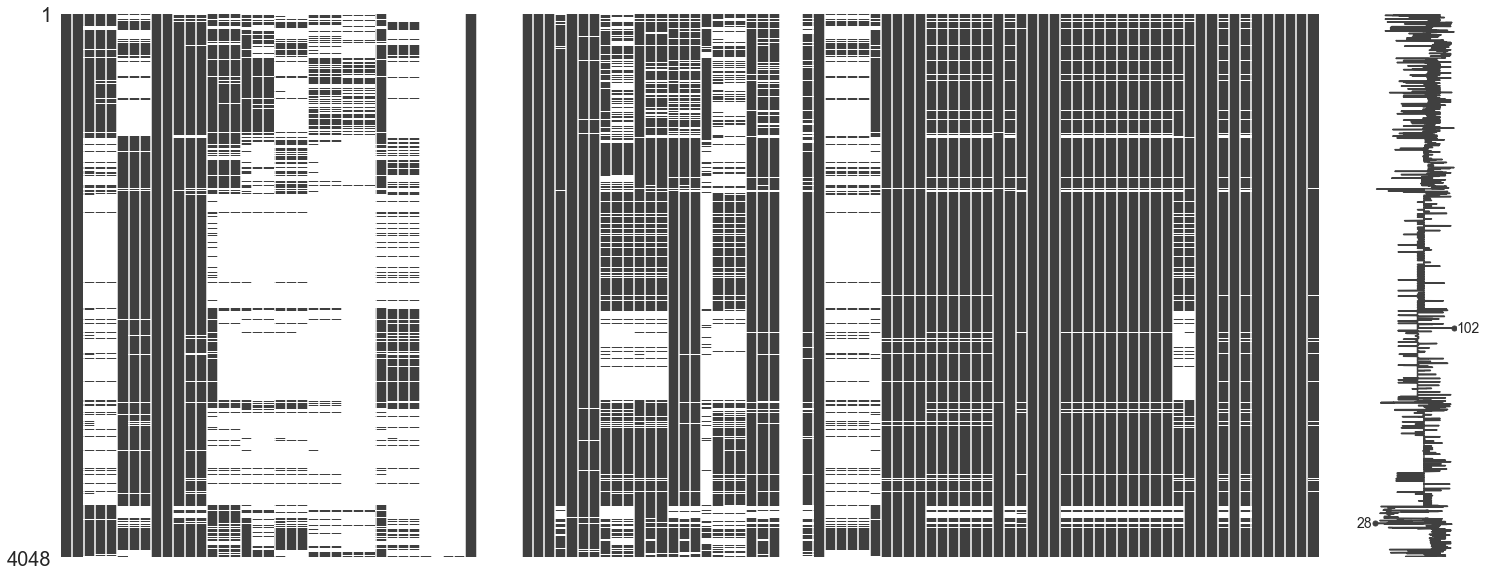

In [763]:
msno.matrix(planeto)

In [764]:
planeto.shape

(4048, 112)

In [765]:
# Null Values representation
planeto.isnull().sum()

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64

In [766]:
# removal of columns having missing values less than 40%
for column in planeto.columns:
    print(column+" : ",planeto[column].isnull().sum())
    if ((planeto[column].isnull().sum()/len(planeto.iloc[:])) > 0.4) and column not in ['P_MASS','P_MASS_ERROR_MIN','P_MASS_ERROR_MAX']:
        planeto.drop(column,axis=1,inplace=True) 
planeto

P_NAME :  0
P_STATUS :  0
P_MASS :  2450
P_MASS_ERROR_MIN :  2581
P_MASS_ERROR_MAX :  2581
P_RADIUS :  909
P_RADIUS_ERROR_MIN :  943
P_RADIUS_ERROR_MAX :  943
P_YEAR :  0
P_UPDATED :  0
P_PERIOD :  110
P_PERIOD_ERROR_MIN :  241
P_PERIOD_ERROR_MAX :  241
P_SEMI_MAJOR_AXIS :  1681
P_SEMI_MAJOR_AXIS_ERROR_MIN :  2485
P_SEMI_MAJOR_AXIS_ERROR_MAX :  2484
P_ECCENTRICITY :  2668
P_ECCENTRICITY_ERROR_MIN :  3077
P_ECCENTRICITY_ERROR_MAX :  3077
P_INCLINATION :  3204
P_INCLINATION_ERROR_MIN :  3236
P_INCLINATION_ERROR_MAX :  3238
P_OMEGA :  3302
P_OMEGA_ERROR_MIN :  3355
P_OMEGA_ERROR_MAX :  3355
P_TPERI :  3567
P_TPERI_ERROR_MIN :  3576
P_TPERI_ERROR_MAX :  3576
P_ANGULAR_DISTANCE :  1687
P_IMPACT_PARAMETER :  2639
P_IMPACT_PARAMETER_ERROR_MIN :  2641
P_IMPACT_PARAMETER_ERROR_MAX :  2641
P_TEMP_MEASURED :  4043
P_GEO_ALBEDO :  4048
P_GEO_ALBEDO_ERROR_MIN :  4043
P_GEO_ALBEDO_ERROR_MAX :  4043
P_DETECTION :  0
P_DETECTION_MASS :  4048
P_DETECTION_RADIUS :  4048
P_ALT_NAMES :  4048
P_ATMOSPHERE 

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,14-05-2014,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,06-09-2018,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,14-05-2014,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,06-09-2018,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,06-09-2018,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,09-03-2019,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,09-03-2019,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


In [767]:
planeto

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,14-05-2014,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,06-09-2018,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,14-05-2014,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,06-09-2018,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,06-09-2018,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,09-03-2019,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,09-03-2019,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


<AxesSubplot:>

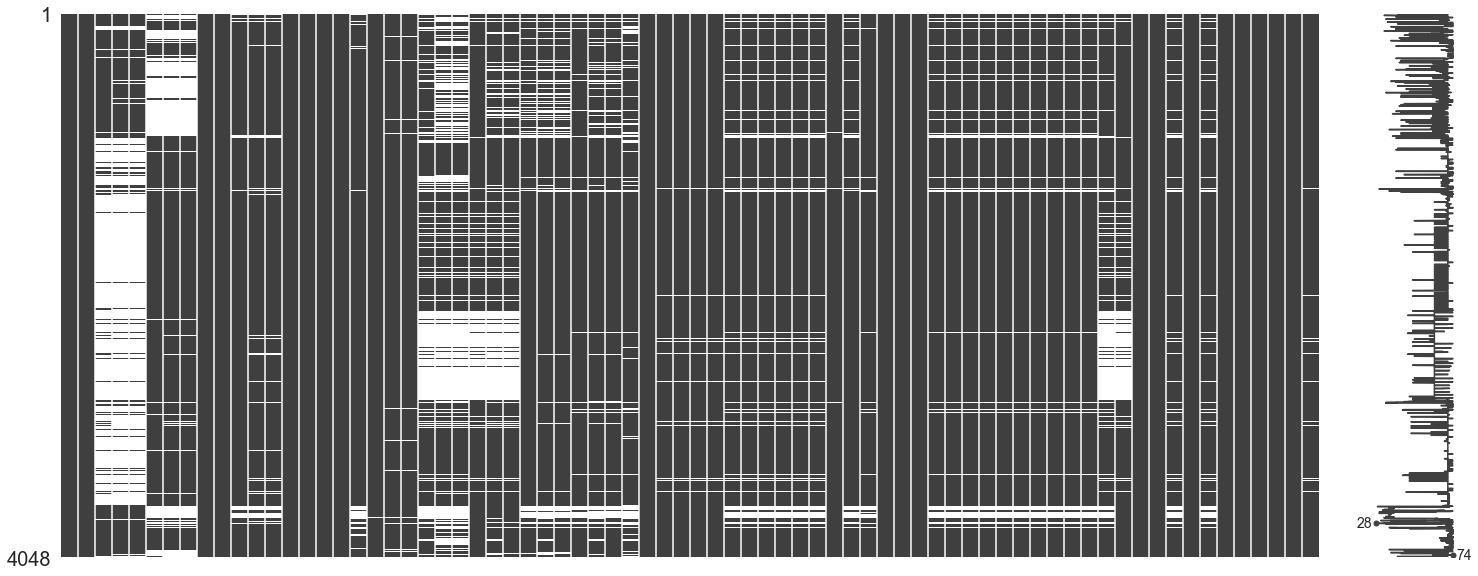

In [768]:
msno.matrix(planeto)

In [769]:
# column-wise null-values presence
len(planeto.columns)

74

In [770]:
planeto.shape

(4048, 74)

In [771]:
for column in planeto.columns:
    print(column+" : ",planeto[column].isnull().sum(),"(",(planeto[column].isnull().sum()/planeto.shape[0])*100,"% )")

P_NAME :  0 ( 0.0 % )
P_STATUS :  0 ( 0.0 % )
P_MASS :  2450 ( 60.523715415019765 % )
P_MASS_ERROR_MIN :  2581 ( 63.759881422924906 % )
P_MASS_ERROR_MAX :  2581 ( 63.759881422924906 % )
P_RADIUS :  909 ( 22.455533596837945 % )
P_RADIUS_ERROR_MIN :  943 ( 23.295454545454543 % )
P_RADIUS_ERROR_MAX :  943 ( 23.295454545454543 % )
P_YEAR :  0 ( 0.0 % )
P_UPDATED :  0 ( 0.0 % )
P_PERIOD :  110 ( 2.717391304347826 % )
P_PERIOD_ERROR_MIN :  241 ( 5.953557312252965 % )
P_PERIOD_ERROR_MAX :  241 ( 5.953557312252965 % )
P_DETECTION :  0 ( 0.0 % )
S_NAME :  0 ( 0.0 % )
S_RA :  0 ( 0.0 % )
S_DEC :  0 ( 0.0 % )
S_MAG :  179 ( 4.421936758893281 % )
S_DISTANCE :  6 ( 0.14822134387351776 % )
S_DISTANCE_ERROR_MIN :  81 ( 2.0009881422924902 % )
S_DISTANCE_ERROR_MAX :  81 ( 2.0009881422924902 % )
S_METALLICITY :  1206 ( 29.792490118577074 % )
S_METALLICITY_ERROR_MIN :  1602 ( 39.57509881422925 % )
S_METALLICITY_ERROR_MAX :  1602 ( 39.57509881422925 % )
S_MASS :  765 ( 18.898221343873516 % )
S_MASS_ERROR_

<AxesSubplot:>

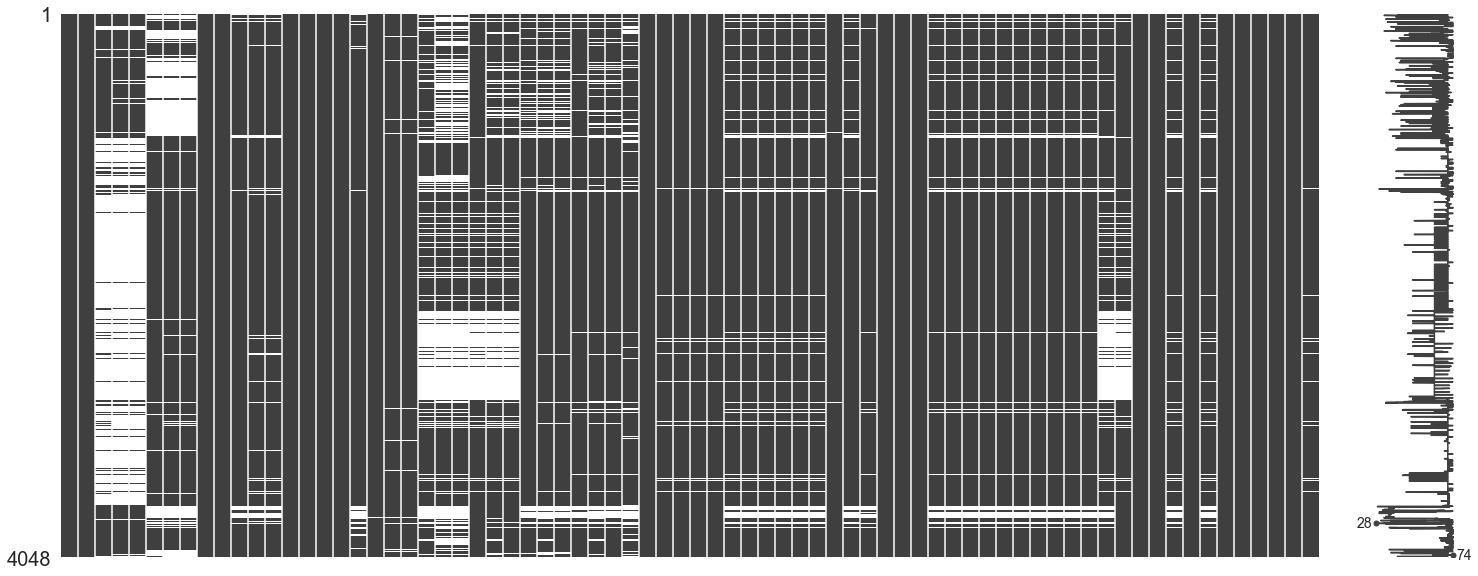

In [772]:
msno.matrix(planeto)

In [773]:
planeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4048 non-null   object 
 1   P_STATUS                 4048 non-null   int64  
 2   P_MASS                   1598 non-null   float64
 3   P_MASS_ERROR_MIN         1467 non-null   float64
 4   P_MASS_ERROR_MAX         1467 non-null   float64
 5   P_RADIUS                 3139 non-null   float64
 6   P_RADIUS_ERROR_MIN       3105 non-null   float64
 7   P_RADIUS_ERROR_MAX       3105 non-null   float64
 8   P_YEAR                   4048 non-null   int64  
 9   P_UPDATED                4048 non-null   object 
 10  P_PERIOD                 3938 non-null   float64
 11  P_PERIOD_ERROR_MIN       3807 non-null   float64
 12  P_PERIOD_ERROR_MAX       3807 non-null   float64
 13  P_DETECTION              4048 non-null   object 
 14  S_NAME                  

In [774]:
# displaying object columns
object_dtype = [column for column in planeto.columns if planeto[column].dtype=="object"] 
object_dtype

['P_NAME',
 'P_UPDATED',
 'P_DETECTION',
 'S_NAME',
 'S_ALT_NAMES',
 'P_TYPE',
 'S_TYPE_TEMP',
 'S_RA_T',
 'S_DEC_T',
 'S_TIDAL_LOCK',
 'P_TYPE_TEMP',
 'S_CONSTELLATION',
 'S_CONSTELLATION_ABR',
 'S_CONSTELLATION_ENG']

In [775]:
planeto_ = planeto
planeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   P_NAME                   4048 non-null   object 
 1   P_STATUS                 4048 non-null   int64  
 2   P_MASS                   1598 non-null   float64
 3   P_MASS_ERROR_MIN         1467 non-null   float64
 4   P_MASS_ERROR_MAX         1467 non-null   float64
 5   P_RADIUS                 3139 non-null   float64
 6   P_RADIUS_ERROR_MIN       3105 non-null   float64
 7   P_RADIUS_ERROR_MAX       3105 non-null   float64
 8   P_YEAR                   4048 non-null   int64  
 9   P_UPDATED                4048 non-null   object 
 10  P_PERIOD                 3938 non-null   float64
 11  P_PERIOD_ERROR_MIN       3807 non-null   float64
 12  P_PERIOD_ERROR_MAX       3807 non-null   float64
 13  P_DETECTION              4048 non-null   object 
 14  S_NAME                  

In [776]:
planeto_

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,14-05-2014,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,06-09-2018,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,14-05-2014,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,06-09-2018,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,06-09-2018,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,09-03-2019,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,09-03-2019,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


In [777]:
planeto.drop(['P_NAME','P_UPDATED','P_YEAR','P_DETECTION','S_NAME','S_ALT_NAMES','S_TYPE_TEMP', 'S_TIDAL_LOCK','S_RA_T','S_DEC_T','S_CONSTELLATION',
 'S_CONSTELLATION_ABR','S_CONSTELLATION_ENG'],axis=1,inplace=True)
planeto.drop(['P_MASS_ERROR_MIN','P_MASS_ERROR_MAX','P_RADIUS_ERROR_MIN','P_RADIUS_ERROR_MAX','P_PERIOD_ERROR_MIN','P_PERIOD_ERROR_MAX','S_DISTANCE_ERROR_MIN','S_DISTANCE_ERROR_MAX','S_METALLICITY_ERROR_MIN','S_METALLICITY_ERROR_MAX','S_MASS_ERROR_MIN','S_MASS_ERROR_MAX','S_RADIUS_ERROR_MIN','S_RADIUS_ERROR_MAX','S_TEMPERATURE_ERROR_MIN','S_TEMPERATURE_ERROR_MAX','P_FLUX_MIN','P_FLUX_MAX','P_TEMP_EQUIL_MIN','P_TEMP_EQUIL_MAX'],axis=1,inplace=True)
planeto.drop(['P_STATUS','S_LOG_G','P_PERIASTRON','P_APASTRON','S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN',
       'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN',
       'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_HABZONE_OPT',
       'P_HABZONE_CON'],axis=1,inplace=True)
planeto

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,P_TYPE,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,6165.86330,NaN,326.030000,185.179280,17.792868,4.740,93.37,-0.35,2.70,19.000000,...,Jovian,19.000000,12.345286,163.546800,Hot,0,0.083813,12.082709,6165.863300,1.29000
1,4684.78480,NaN,516.219970,229.274540,71.823898,5.016,125.72,-0.02,2.78,29.790000,...,Jovian,29.790000,15.284970,250.492940,Hot,0,0.082414,12.229641,4684.784800,1.53000
2,1525.57440,NaN,185.840000,352.822570,39.236198,5.227,75.59,-0.24,2.20,11.000000,...,Jovian,11.000000,23.521506,58.175144,Hot,0,0.081917,12.848516,1525.574400,0.83000
3,1481.07850,NaN,1773.400000,242.601300,43.817646,6.610,17.94,0.41,0.90,0.930000,...,Jovian,0.930000,16.173421,0.629171,Cold,0,0.145241,12.865261,1481.078500,2.93000
4,565.73385,NaN,798.500000,295.466550,50.517525,6.250,21.15,0.06,1.08,1.130000,...,Jovian,1.130000,19.697771,1.250596,Warm,0,0.368627,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,NaN,1.87,28.165600,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,Superterran,0.374241,11.980395,0.025403,Warm,2,0.755038,1.870000,4.155456,0.13456
4044,NaN,2.76,7.906961,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,Neptunian,0.374241,11.980395,0.025403,Hot,0,0.363831,2.760000,8.047485,0.05769
4045,1.38000,NaN,3.204000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,Terran,0.156000,3.599917,0.001658,Hot,0,0.588562,1.102775,1.380000,0.02100
4046,1.75000,NaN,6.689000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,Terran,0.156000,3.599917,0.001658,Warm,1,0.879042,1.178333,1.750000,0.03500


In [778]:
planeto

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,P_TYPE,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,6165.86330,NaN,326.030000,185.179280,17.792868,4.740,93.37,-0.35,2.70,19.000000,...,Jovian,19.000000,12.345286,163.546800,Hot,0,0.083813,12.082709,6165.863300,1.29000
1,4684.78480,NaN,516.219970,229.274540,71.823898,5.016,125.72,-0.02,2.78,29.790000,...,Jovian,29.790000,15.284970,250.492940,Hot,0,0.082414,12.229641,4684.784800,1.53000
2,1525.57440,NaN,185.840000,352.822570,39.236198,5.227,75.59,-0.24,2.20,11.000000,...,Jovian,11.000000,23.521506,58.175144,Hot,0,0.081917,12.848516,1525.574400,0.83000
3,1481.07850,NaN,1773.400000,242.601300,43.817646,6.610,17.94,0.41,0.90,0.930000,...,Jovian,0.930000,16.173421,0.629171,Cold,0,0.145241,12.865261,1481.078500,2.93000
4,565.73385,NaN,798.500000,295.466550,50.517525,6.250,21.15,0.06,1.08,1.130000,...,Jovian,1.130000,19.697771,1.250596,Warm,0,0.368627,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,NaN,1.87,28.165600,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,Superterran,0.374241,11.980395,0.025403,Warm,2,0.755038,1.870000,4.155456,0.13456
4044,NaN,2.76,7.906961,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,Neptunian,0.374241,11.980395,0.025403,Hot,0,0.363831,2.760000,8.047485,0.05769
4045,1.38000,NaN,3.204000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,Terran,0.156000,3.599917,0.001658,Hot,0,0.588562,1.102775,1.380000,0.02100
4046,1.75000,NaN,6.689000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,Terran,0.156000,3.599917,0.001658,Warm,1,0.879042,1.178333,1.750000,0.03500


In [779]:
planeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_MASS                 1598 non-null   float64
 1   P_RADIUS               3139 non-null   float64
 2   P_PERIOD               3938 non-null   float64
 3   S_RA                   4048 non-null   float64
 4   S_DEC                  4048 non-null   float64
 5   S_MAG                  3869 non-null   float64
 6   S_DISTANCE             4042 non-null   float64
 7   S_METALLICITY          2842 non-null   float64
 8   S_MASS                 3283 non-null   float64
 9   S_RADIUS               3723 non-null   float64
 10  S_TEMPERATURE          3841 non-null   float64
 11  P_DISTANCE             3978 non-null   float64
 12  P_DISTANCE_EFF         3978 non-null   float64
 13  P_FLUX                 3721 non-null   float64
 14  P_TEMP_EQUIL           3721 non-null   float64
 15  P_TY

In [780]:
#planeto.drop(['P_MASS_ERROR_MIN','P_MASS_ERROR_MAX','P_RADIUS_ERROR_MIN','P_RADIUS_ERROR_MAX','P_PERIOD_ERROR_MIN','P_PERIOD_ERROR_MAX','S_DISTANCE_ERROR_MIN','S_DISTANCE_ERROR_MAX','S_METALLICITY_ERROR_MIN','S_METALLICITY_ERROR_MAX','S_MASS_ERROR_MIN','S_MASS_ERROR_MAX','S_RADIUS_ERROR_MIN','S_RADIUS_ERROR_MAX','S_TEMPERATURE_ERROR_MIN','S_TEMPERATURE_ERROR_MAX','P_FLUX_MIN','P_FLUX_MAX','P_TEMP_EQUIL_MIN','P_TEMP_EQUIL_MAX'],axis=1,inplace=True)
planeto

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,P_TYPE,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,6165.86330,NaN,326.030000,185.179280,17.792868,4.740,93.37,-0.35,2.70,19.000000,...,Jovian,19.000000,12.345286,163.546800,Hot,0,0.083813,12.082709,6165.863300,1.29000
1,4684.78480,NaN,516.219970,229.274540,71.823898,5.016,125.72,-0.02,2.78,29.790000,...,Jovian,29.790000,15.284970,250.492940,Hot,0,0.082414,12.229641,4684.784800,1.53000
2,1525.57440,NaN,185.840000,352.822570,39.236198,5.227,75.59,-0.24,2.20,11.000000,...,Jovian,11.000000,23.521506,58.175144,Hot,0,0.081917,12.848516,1525.574400,0.83000
3,1481.07850,NaN,1773.400000,242.601300,43.817646,6.610,17.94,0.41,0.90,0.930000,...,Jovian,0.930000,16.173421,0.629171,Cold,0,0.145241,12.865261,1481.078500,2.93000
4,565.73385,NaN,798.500000,295.466550,50.517525,6.250,21.15,0.06,1.08,1.130000,...,Jovian,1.130000,19.697771,1.250596,Warm,0,0.368627,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,NaN,1.87,28.165600,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,Superterran,0.374241,11.980395,0.025403,Warm,2,0.755038,1.870000,4.155456,0.13456
4044,NaN,2.76,7.906961,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,Neptunian,0.374241,11.980395,0.025403,Hot,0,0.363831,2.760000,8.047485,0.05769
4045,1.38000,NaN,3.204000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,Terran,0.156000,3.599917,0.001658,Hot,0,0.588562,1.102775,1.380000,0.02100
4046,1.75000,NaN,6.689000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,Terran,0.156000,3.599917,0.001658,Warm,1,0.879042,1.178333,1.750000,0.03500


In [781]:
for column in planeto.columns:
    print(column+" : ",planeto[column].isnull().sum(),"(",(planeto[column].isnull().sum()/planeto.shape[0])*100,"% )")

P_MASS :  2450 ( 60.523715415019765 % )
P_RADIUS :  909 ( 22.455533596837945 % )
P_PERIOD :  110 ( 2.717391304347826 % )
S_RA :  0 ( 0.0 % )
S_DEC :  0 ( 0.0 % )
S_MAG :  179 ( 4.421936758893281 % )
S_DISTANCE :  6 ( 0.14822134387351776 % )
S_METALLICITY :  1206 ( 29.792490118577074 % )
S_MASS :  765 ( 18.898221343873516 % )
S_RADIUS :  325 ( 8.028656126482213 % )
S_TEMPERATURE :  207 ( 5.113636363636364 % )
P_DISTANCE :  70 ( 1.7292490118577075 % )
P_DISTANCE_EFF :  70 ( 1.7292490118577075 % )
P_FLUX :  327 ( 8.07806324110672 % )
P_TEMP_EQUIL :  327 ( 8.07806324110672 % )
P_TYPE :  17 ( 0.4199604743083004 % )
S_RADIUS_EST :  204 ( 5.0395256916996045 % )
S_RA_H :  0 ( 0.0 % )
S_LUMINOSITY :  262 ( 6.472332015810276 % )
P_TYPE_TEMP :  327 ( 8.07806324110672 % )
P_HABITABLE :  0 ( 0.0 % )
P_ESI :  327 ( 8.07806324110672 % )
P_RADIUS_EST :  0 ( 0.0 % )
P_MASS_EST :  0 ( 0.0 % )
P_SEMI_MAJOR_AXIS_EST :  70 ( 1.7292490118577075 % )


<AxesSubplot:>

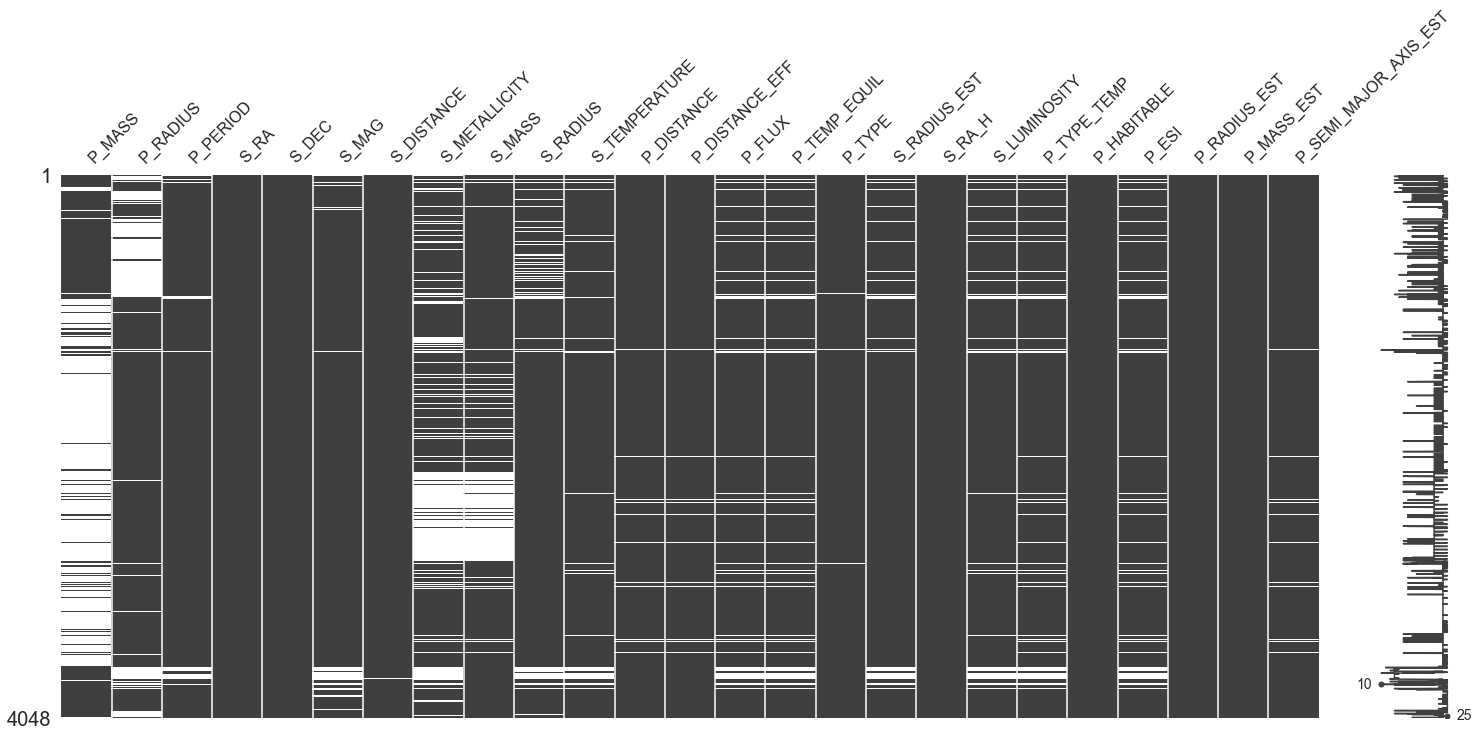

In [782]:
msno.matrix(planeto)

In [783]:
# columns required for caegorical encoding
encoding_list = [column for column in planeto.columns if planeto[column].dtype=='object']
encoding_list

['P_TYPE', 'P_TYPE_TEMP']

In [784]:
for c in encoding_list:
    print(c," : ",planeto[c].unique())

P_TYPE  :  ['Jovian' nan 'Superterran' 'Neptunian' 'Subterran' 'Terran' 'Miniterran']
P_TYPE_TEMP  :  ['Hot' 'Cold' 'Warm' nan]


In [785]:
encoder = OrdinalEncoder()
planeto.P_TYPE = encoder.fit_transform(planeto.P_TYPE)

In [786]:
planeto.P_TYPE

0       1
1       1
2       1
3       1
4       1
       ..
4043    3
4044    4
4045    6
4046    6
4047    6
Name: P_TYPE, Length: 4048, dtype: int32

In [787]:
encoder = OrdinalEncoder()
planeto.P_TYPE_TEMP = encoder.fit_transform(planeto.P_TYPE_TEMP)

In [788]:
planeto.P_TYPE_TEMP

0       1
1       1
2       1
3       2
4       3
       ..
4043    3
4044    1
4045    1
4046    3
4047    3
Name: P_TYPE_TEMP, Length: 4048, dtype: int32

In [789]:
planeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_MASS                 1598 non-null   float64
 1   P_RADIUS               3139 non-null   float64
 2   P_PERIOD               3938 non-null   float64
 3   S_RA                   4048 non-null   float64
 4   S_DEC                  4048 non-null   float64
 5   S_MAG                  3869 non-null   float64
 6   S_DISTANCE             4042 non-null   float64
 7   S_METALLICITY          2842 non-null   float64
 8   S_MASS                 3283 non-null   float64
 9   S_RADIUS               3723 non-null   float64
 10  S_TEMPERATURE          3841 non-null   float64
 11  P_DISTANCE             3978 non-null   float64
 12  P_DISTANCE_EFF         3978 non-null   float64
 13  P_FLUX                 3721 non-null   float64
 14  P_TEMP_EQUIL           3721 non-null   float64
 15  P_TY

In [790]:
# Iterative Imputer.
imputer = IterativeImputer()

In [791]:
imputer.fit(planeto)

IterativeImputer()

In [792]:
planet = imputer.transform(planeto)
planeto = pd.DataFrame(planet,columns=planeto.columns)
planeto

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,P_TYPE,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,6165.863300,12.082709,326.030000,185.179280,17.792868,4.740,93.37,-0.35,2.70,19.000000,...,1.0,19.000000,12.345286,163.546800,1.0,0.0,0.083813,12.082709,6165.863300,1.29000
1,4684.784800,12.229641,516.219970,229.274540,71.823898,5.016,125.72,-0.02,2.78,29.790000,...,1.0,29.790000,15.284970,250.492940,1.0,0.0,0.082414,12.229641,4684.784800,1.53000
2,1525.574400,12.848516,185.840000,352.822570,39.236198,5.227,75.59,-0.24,2.20,11.000000,...,1.0,11.000000,23.521506,58.175144,1.0,0.0,0.081917,12.848516,1525.574400,0.83000
3,1481.078500,12.865261,1773.400000,242.601300,43.817646,6.610,17.94,0.41,0.90,0.930000,...,1.0,0.930000,16.173421,0.629171,2.0,0.0,0.145241,12.865261,1481.078500,2.93000
4,565.733850,13.421749,798.500000,295.466550,50.517525,6.250,21.15,0.06,1.08,1.130000,...,1.0,1.130000,19.697771,1.250596,3.0,0.0,0.368627,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,4.174797,1.870000,28.165600,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,3.0,0.374241,11.980395,0.025403,3.0,2.0,0.755038,1.870000,4.155456,0.13456
4044,8.034116,2.760000,7.906961,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,4.0,0.374241,11.980395,0.025403,1.0,0.0,0.363831,2.760000,8.047485,0.05769
4045,1.380000,1.102775,3.204000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,6.0,0.156000,3.599917,0.001658,1.0,0.0,0.588562,1.102775,1.380000,0.02100
4046,1.750000,1.178333,6.689000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,6.0,0.156000,3.599917,0.001658,3.0,1.0,0.879042,1.178333,1.750000,0.03500


In [793]:
planeto.isnull().sum()

P_MASS                   0
P_RADIUS                 0
P_PERIOD                 0
S_RA                     0
S_DEC                    0
S_MAG                    0
S_DISTANCE               0
S_METALLICITY            0
S_MASS                   0
S_RADIUS                 0
S_TEMPERATURE            0
P_DISTANCE               0
P_DISTANCE_EFF           0
P_FLUX                   0
P_TEMP_EQUIL             0
P_TYPE                   0
S_RADIUS_EST             0
S_RA_H                   0
S_LUMINOSITY             0
P_TYPE_TEMP              0
P_HABITABLE              0
P_ESI                    0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
dtype: int64

<AxesSubplot:>

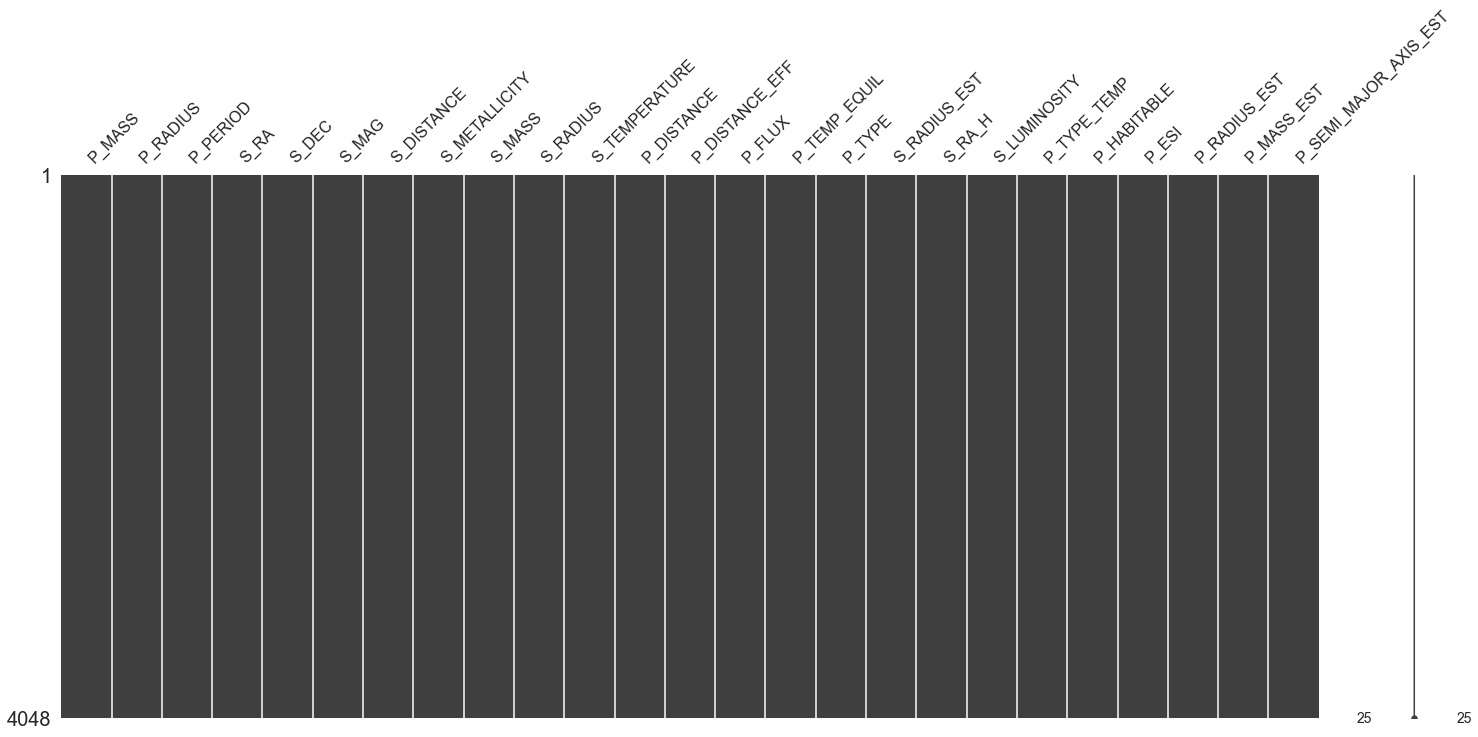

In [794]:
msno.matrix(planeto)

# DATA VISUALIZATION AND EDA

In [795]:
# Exoplanets in the Dataset have been classified as 
'''0 : Non-Habitable
1 : Conservative
2 : Optimistic'''


'0 : Non-Habitable\n1 : Conservative\n2 : Optimistic'

In [796]:
planeto.P_HABITABLE.value_counts()

0.0    3993
2.0      34
1.0      21
Name: P_HABITABLE, dtype: int64

In [797]:
planeto.P_HABITABLE.iloc[:].replace(to_replace = {2},value={1},inplace=True)

In [798]:
planeto.P_HABITABLE.value_counts()

0.0    3993
1.0      55
Name: P_HABITABLE, dtype: int64

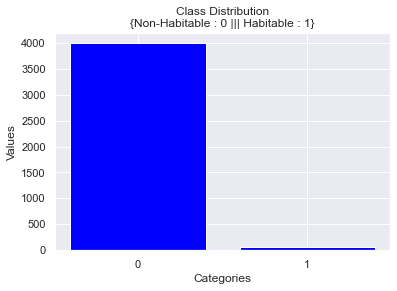

In [799]:
#Target Class Distribution
data = planeto.P_HABITABLE.value_counts().to_dict()
p = list(data.keys())
q = list(data.values())
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Class Distribution\n"+"{Non-Habitable : 0 ||| Habitable : 1}")
plt.bar(x=p,height=q,color = 'blue')
plt.xticks([0,1])
plt.show()

# Effect of Mass & Radius on Habitability

In [800]:
planeto.P_MASS

0       6165.863300
1       4684.784800
2       1525.574400
3       1481.078500
4        565.733850
           ...     
4043       4.174797
4044       8.034116
4045       1.380000
4046       1.750000
4047       1.680000
Name: P_MASS, Length: 4048, dtype: float64

In [801]:
planeto[planeto.P_RADIUS < 0]

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,P_TYPE,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
23,0.077325,-4.211051e-08,11688.000,69.400551,-2.473548,5.230,29.40,-0.027000,1.75,1.206676,...,2.0,1.206676,4.626704,3.945632,4.0,0.0,0.598472,0.0,0.0,12.000000
128,-1.826671,-6.936525e-07,555530.000,344.412690,-29.622236,1.160,7.70,-16.811718,1.92,57.420220,...,2.0,57.420220,22.960847,595.014378,4.0,0.0,-0.212147,0.0,0.0,160.000000
2894,-0.098811,-3.453183e-09,8.708,293.804430,38.639131,15.842,538.39,-0.245237,0.67,0.640000,...,2.0,0.640000,19.586963,14.445454,4.0,0.0,0.714406,0.0,0.0,0.072468


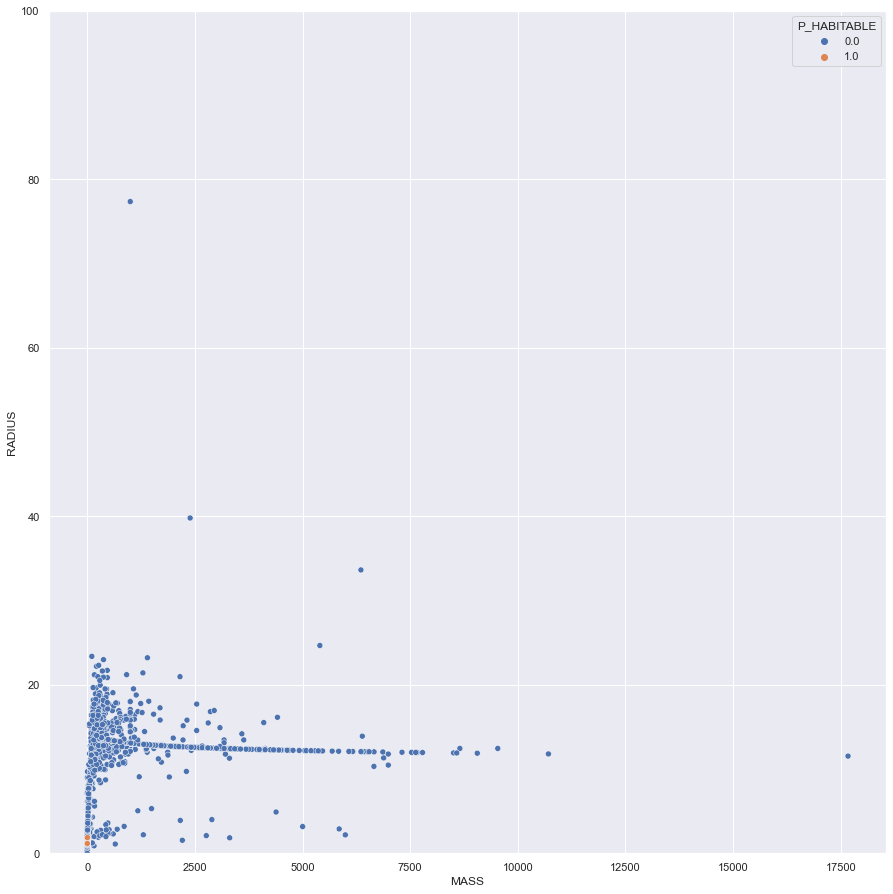

In [802]:
colors = ['blue' if planeto.P_HABITABLE.iloc[i] == 0 else 'red' for i in range(planeto.shape[0])]
markers = ['c' if planeto.P_HABITABLE.iloc[i] == 0 else 'o' for i in range(planeto.shape[0])]
plt.rcParams["figure.figsize"] = (15,15.5)
plt.xlabel("MASS")
plt.ylabel("RADIUS")
plt.ylim((0,100))
sns.scatterplot(x='P_MASS',y='P_RADIUS',hue='P_HABITABLE',data=planeto)
plt.show()

In [803]:
planeto['P_GRAVITY'] = (6.75*pow(10,-11)*planeto['P_MASS'])/(pow(planeto['P_RADIUS'],2))*pow(10,9)

In [804]:
planeto

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_GRAVITY
0,6165.863300,12.082709,326.030000,185.179280,17.792868,4.740,93.37,-0.35,2.70,19.000000,...,19.000000,12.345286,163.546800,1.0,0.0,0.083813,12.082709,6165.863300,1.29000,2.850815
1,4684.784800,12.229641,516.219970,229.274540,71.823898,5.016,125.72,-0.02,2.78,29.790000,...,29.790000,15.284970,250.492940,1.0,0.0,0.082414,12.229641,4684.784800,1.53000,2.114297
2,1525.574400,12.848516,185.840000,352.822570,39.236198,5.227,75.59,-0.24,2.20,11.000000,...,11.000000,23.521506,58.175144,1.0,0.0,0.081917,12.848516,1525.574400,0.83000,0.623780
3,1481.078500,12.865261,1773.400000,242.601300,43.817646,6.610,17.94,0.41,0.90,0.930000,...,0.930000,16.173421,0.629171,2.0,0.0,0.145241,12.865261,1481.078500,2.93000,0.604011
4,565.733850,13.421749,798.500000,295.466550,50.517525,6.250,21.15,0.06,1.08,1.130000,...,1.130000,19.697771,1.250596,3.0,0.0,0.368627,13.421749,565.733850,1.66000,0.211981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,4.174797,1.870000,28.165600,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,0.374241,11.980395,0.025403,3.0,1.0,0.755038,1.870000,4.155456,0.13456,0.080585
4044,8.034116,2.760000,7.906961,179.705920,-3.389389,14.900,160.00,0.00,0.41,0.374241,...,0.374241,11.980395,0.025403,1.0,0.0,0.363831,2.760000,8.047485,0.05769,0.071191
4045,1.380000,1.102775,3.204000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,0.156000,3.599917,0.001658,1.0,0.0,0.588562,1.102775,1.380000,0.02100,0.076597
4046,1.750000,1.178333,6.689000,53.998749,-44.512703,13.060,3.69,-0.08,0.12,0.156000,...,0.156000,3.599917,0.001658,3.0,1.0,0.879042,1.178333,1.750000,0.03500,0.085076


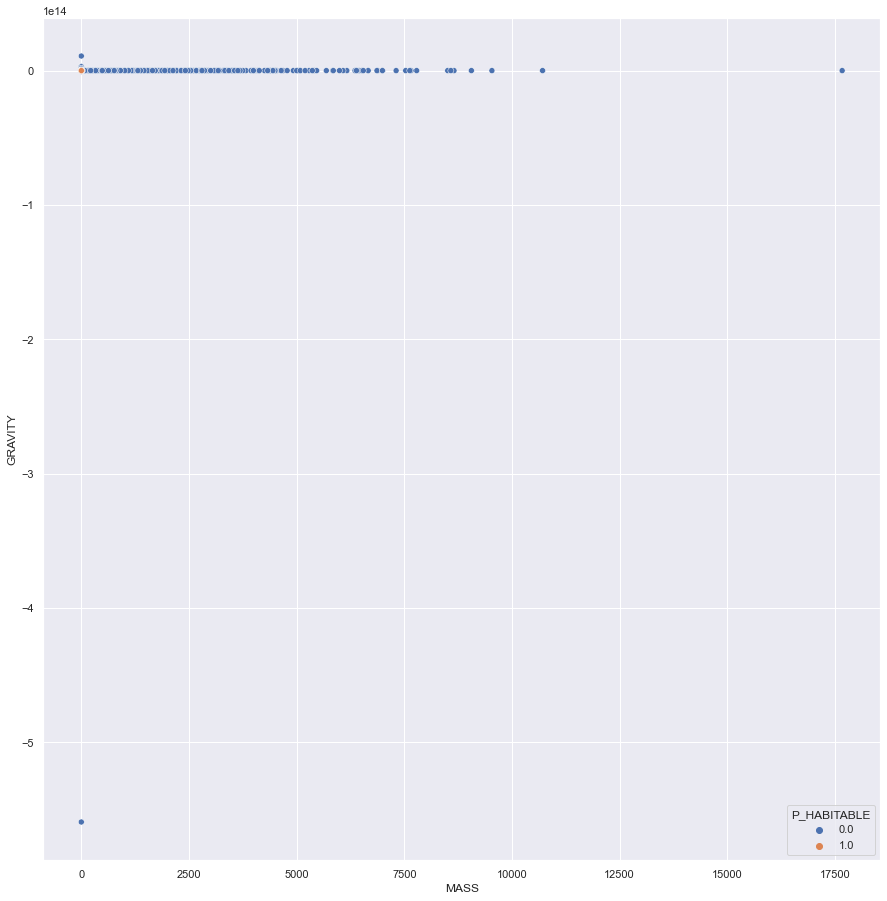

In [805]:
colors = ['blue' if planeto.P_HABITABLE.iloc[i] == 0 else 'red' for i in range(planeto.shape[0])]
markers = ['c' if planeto.P_HABITABLE.iloc[i] == 0 else 'o' for i in range(planeto.shape[0])]
plt.rcParams["figure.figsize"] = (15,15.5)
plt.xlabel("MASS")
plt.ylabel("GRAVITY")
#plt.ylim((0,pow(10,-7)))
sns.scatterplot(x='P_MASS',y='P_GRAVITY',hue="P_HABITABLE",data=planeto)
plt.show()

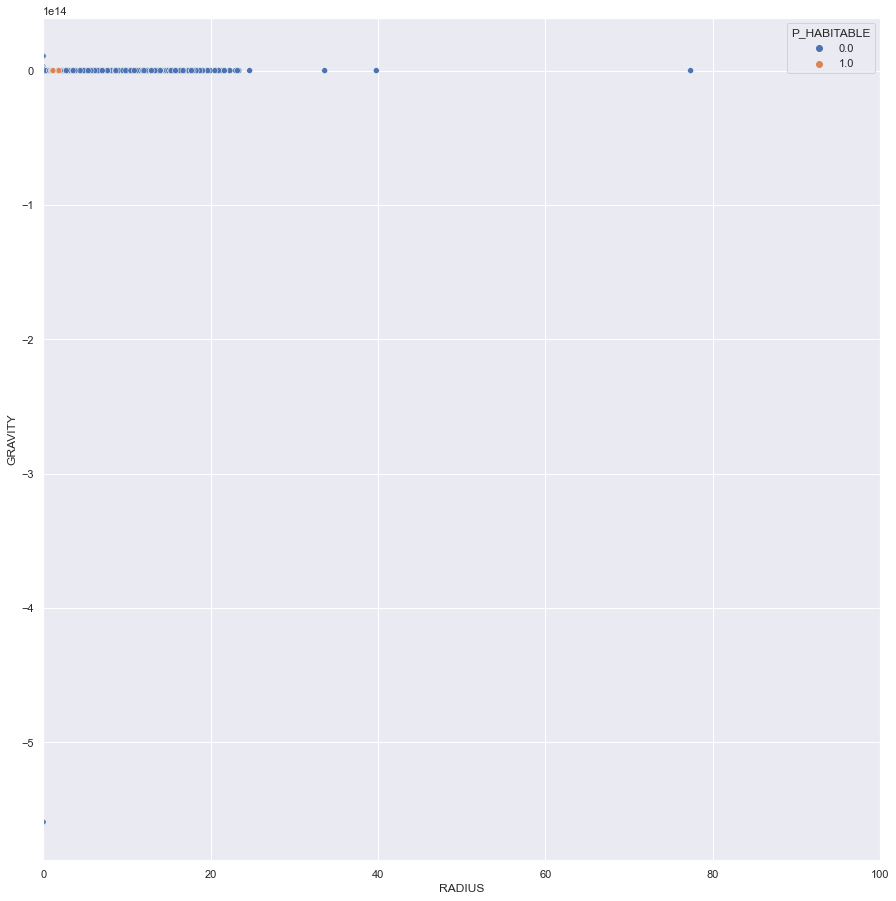

In [806]:
colors = ['blue' if planeto.P_HABITABLE.iloc[i] == 0 else 'red' for i in range(planeto.shape[0])]
markers = ['c' if planeto.P_HABITABLE.iloc[i] == 0 else 'o' for i in range(planeto.shape[0])]
plt.rcParams["figure.figsize"] = (15,15.5)
plt.xlabel("RADIUS")
plt.ylabel("GRAVITY")
#plt.ylim(0,pow(10,-7))
plt.xlim((0,100))
sns.scatterplot(x='P_RADIUS',y='P_GRAVITY',hue='P_HABITABLE',data=planeto)
plt.show()

In [807]:
planeto.loc[planeto['P_HABITABLE']==1]

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_GRAVITY
137,6.801519,2.499655,25.630580,62.315273,-53.373699,11.810,15.14,0.100000,0.400000,0.382000,...,0.382000,4.154352,0.019619,3.0,1.0,0.686705,2.499655,6.801519,0.125400,0.073477
140,2.889057,1.509595,18.649800,111.852080,5.225785,9.872,3.80,0.090000,0.290000,0.290000,...,0.290000,7.456806,0.009858,3.0,1.0,0.843422,1.509595,2.889057,0.091101,0.085573
151,7.599268,2.668393,48.134500,67.148820,-25.169301,11.962,20.20,0.020000,0.420000,0.400000,...,0.400000,4.476588,0.020688,3.0,1.0,0.619738,2.668393,7.599268,0.193940,0.072040
153,2.021386,1.226695,5.363600,75.489280,-6.946263,12.220,5.32,-0.270000,0.160000,0.120000,...,0.120000,5.032619,0.001285,3.0,1.0,0.898398,1.226695,2.021386,0.032820,0.090673
159,6.099119,2.344216,55.661000,144.006820,-21.660797,10.920,9.44,-0.120000,0.340000,0.340000,...,0.340000,9.600455,0.015631,3.0,1.0,0.571287,2.344216,6.099119,0.204000,0.074916
177,3.813936,1.777887,28.140000,259.745090,-34.996827,10.220,6.80,-0.550000,0.330000,0.429296,...,0.429296,17.316340,0.020796,3.0,1.0,0.777962,1.777887,3.813936,0.125000,0.081446
178,2.542624,1.400188,62.240000,259.745090,-34.996827,10.220,6.80,-0.550000,0.330000,0.429296,...,0.429296,17.316340,0.020796,3.0,1.0,0.712194,1.400188,2.542624,0.213000,0.087541
179,2.542624,1.400188,39.026000,259.745090,-34.996827,10.220,6.80,-0.550000,0.330000,0.429296,...,0.429296,17.316340,0.020796,3.0,1.0,0.869776,1.400188,2.542624,0.156000,0.087541
189,5.403076,2.182734,35.680000,323.391570,-49.009006,8.660,4.97,-0.300000,0.450000,0.495571,...,0.495571,21.559439,0.031976,3.0,1.0,0.727791,2.182734,5.403076,0.163000,0.076550
740,7.087565,2.561049,197.800000,88.517670,-60.023472,7.170,12.94,-0.310000,0.770000,0.844783,...,0.844783,5.901178,0.385749,3.0,1.0,0.687468,2.561050,7.087565,0.600000,0.072940


In [808]:
planeto.columns

Index(['P_MASS', 'P_RADIUS', 'P_PERIOD', 'S_RA', 'S_DEC', 'S_MAG',
       'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_TEMPERATURE',
       'P_DISTANCE', 'P_DISTANCE_EFF', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE',
       'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'P_TYPE_TEMP', 'P_HABITABLE',
       'P_ESI', 'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST',
       'P_GRAVITY'],
      dtype='object')

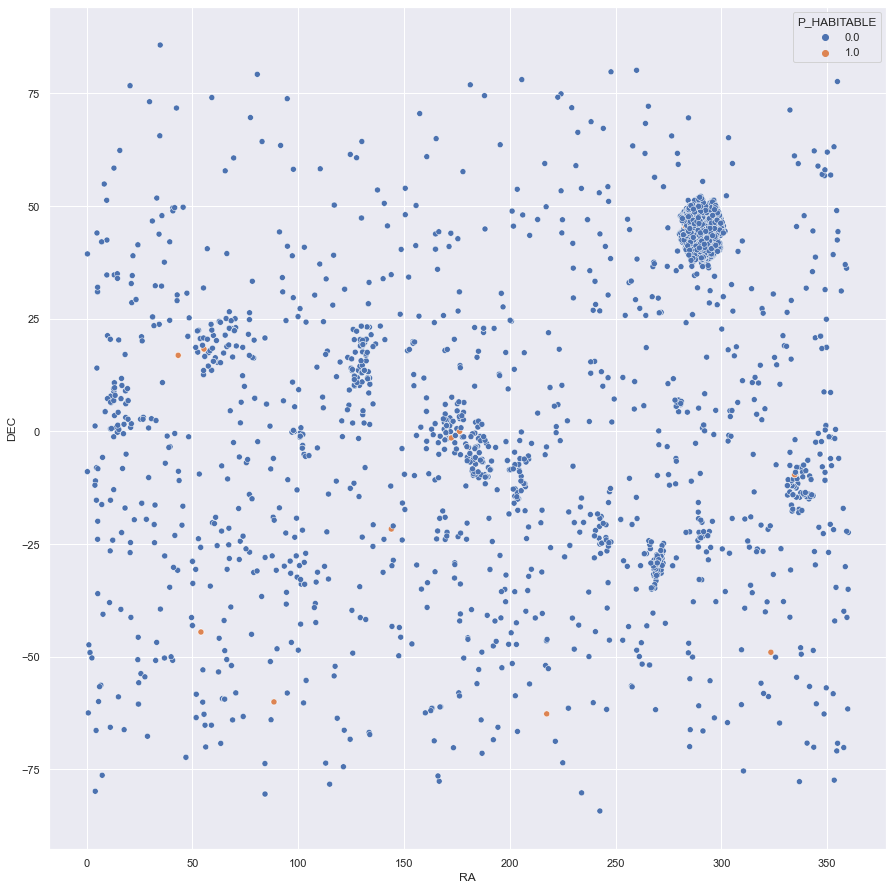

In [809]:
plt.rcParams["figure.figsize"] = (15,15.5)
plt.xlabel("RA")
plt.ylabel("DEC")
#plt.ylim(0,pow(10,-7))
#plt.xlim((0,100))
sns.scatterplot(x='S_RA',y='S_DEC',hue='P_HABITABLE',data=planeto)
plt.show()

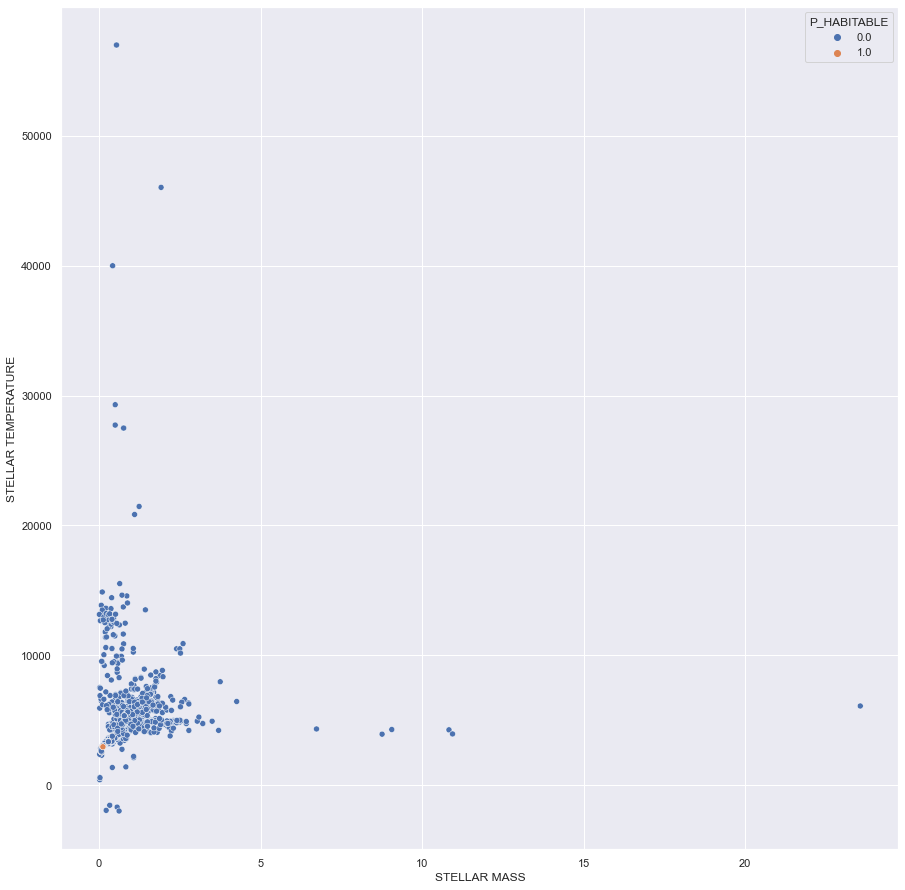

In [810]:
plt.rcParams["figure.figsize"] = (15,15.5)
plt.xlabel("STELLAR MASS")
plt.ylabel("STELLAR TEMPERATURE")
#plt.ylim(0,pow(10,-7))
#plt.xlim((0,100))
sns.scatterplot(x='S_MASS',y='S_TEMPERATURE',hue='P_HABITABLE',data=planeto)
plt.show()

In [811]:
planeto.S_LUMINOSITY

0       163.546800
1       250.492940
2        58.175144
3         0.629171
4         1.250596
           ...    
4043      0.025403
4044      0.025403
4045      0.001658
4046      0.001658
4047      0.001658
Name: S_LUMINOSITY, Length: 4048, dtype: float64

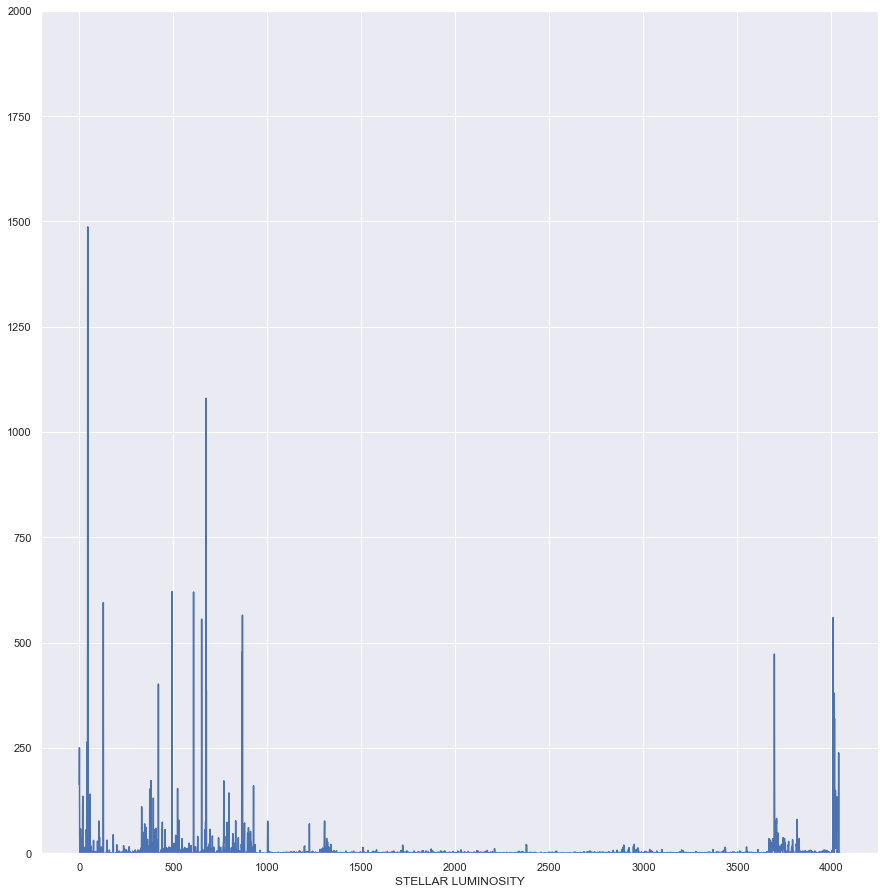

In [812]:
plt.xlabel("STELLAR LUMINOSITY")
plt.ylim(0,2000)
#plt.xlim((0,100))
plt.plot(planeto['S_LUMINOSITY'])
plt.show()

In [813]:
planeto.corr()

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_GRAVITY
P_MASS,1.000000,0.439255,0.090550,-0.178734,-0.212480,-0.252468,-0.042951,-0.057900,0.302958,0.380985,...,0.380985,-0.178734,0.380313,0.212979,-0.038802,-0.172239,0.439255,1.000000,0.222524,0.004892
P_RADIUS,0.439255,1.000000,0.027392,-0.354372,-0.445977,-0.392296,-0.062750,0.024403,0.297311,0.220952,...,0.220952,-0.354372,0.132115,0.203022,-0.082867,-0.497372,1.000000,0.439259,0.087395,0.015136
P_PERIOD,0.090550,0.027392,1.000000,-0.001930,-0.030142,0.375768,-0.021881,-0.892521,-0.022614,0.011479,...,0.011479,-0.001930,0.012497,0.024134,-0.002535,-0.025068,0.027392,0.090552,0.088773,0.000318
S_RA,-0.178734,-0.354372,-0.001930,1.000000,0.457448,0.378830,0.255130,-0.010309,-0.069815,-0.104433,...,-0.104433,1.000000,-0.062257,-0.095860,-0.020239,0.114800,-0.354372,-0.178733,-0.052755,-0.009914
S_DEC,-0.212480,-0.445977,-0.030142,0.457448,1.000000,0.302104,0.078381,0.018458,0.009998,-0.003991,...,-0.003991,0.457448,-0.006402,-0.283163,-0.037210,0.118675,-0.445977,-0.212480,-0.075773,-0.007994
S_MAG,-0.252468,-0.392296,0.375768,0.378830,0.302104,1.000000,0.598842,-0.322540,-0.244795,-0.252905,...,-0.252905,0.378830,-0.152642,-0.033621,0.030958,0.133432,-0.392296,-0.252467,-0.018361,-0.013883
S_DISTANCE,-0.042951,-0.062750,-0.021881,0.255130,0.078381,0.598842,1.000000,-0.006482,-0.057843,-0.016892,...,-0.016892,0.255130,0.028212,0.204120,-0.059297,-0.067181,-0.062750,-0.042949,-0.036780,0.001617
S_METALLICITY,-0.057900,0.024403,-0.892521,-0.010309,0.018458,-0.322540,-0.006482,1.000000,0.035909,-0.116702,...,-0.116702,-0.010309,-0.116273,-0.074805,-0.017978,-0.025915,0.024403,-0.057914,-0.075332,0.004558
S_MASS,0.302958,0.297311,-0.022614,-0.069815,0.009998,-0.244795,-0.057843,0.035909,1.000000,0.501933,...,0.501933,-0.069815,0.502477,-0.135747,-0.096350,-0.277927,0.297311,0.302959,-0.012600,0.008776
S_RADIUS,0.380985,0.220952,0.011479,-0.104433,-0.003991,-0.252905,-0.016892,-0.116702,0.501933,1.000000,...,1.000000,-0.104433,0.916573,-0.037175,-0.032332,-0.188598,0.220952,0.380995,-0.041567,0.003437


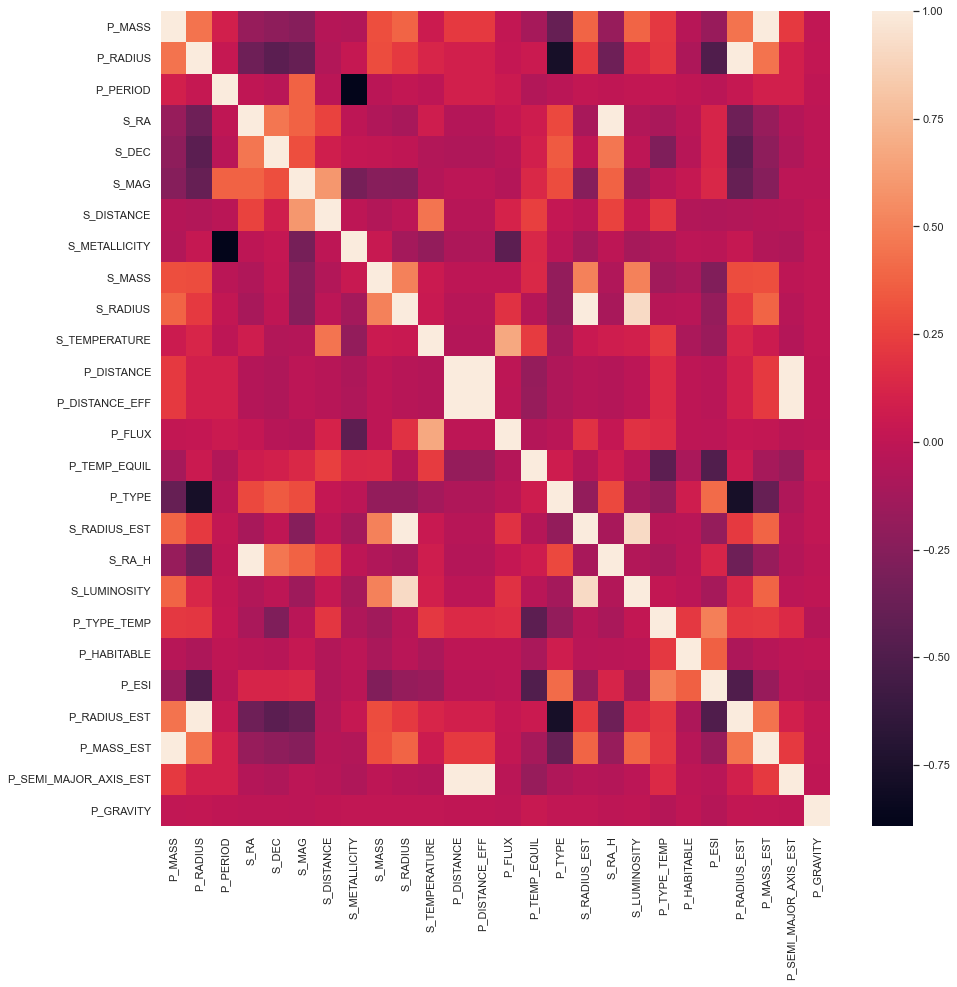

In [814]:
plt.figure(figsize=(15,15))
sns.heatmap(planeto.corr())
plt.show()

In [815]:
planeto.corr().P_HABITABLE

P_MASS                  -0.038802
P_RADIUS                -0.082867
P_PERIOD                -0.002535
S_RA                    -0.020239
S_DEC                   -0.037210
S_MAG                    0.030958
S_DISTANCE              -0.059297
S_METALLICITY           -0.017978
S_MASS                  -0.096350
S_RADIUS                -0.032332
S_TEMPERATURE           -0.093787
P_DISTANCE              -0.007089
P_DISTANCE_EFF          -0.007048
P_FLUX                  -0.010407
P_TEMP_EQUIL            -0.098837
P_TYPE                   0.068741
S_RADIUS_EST            -0.032332
S_RA_H                  -0.020239
S_LUMINOSITY            -0.014639
P_TYPE_TEMP              0.209078
P_HABITABLE              1.000000
P_ESI                    0.368917
P_RADIUS_EST            -0.082867
P_MASS_EST              -0.038804
P_SEMI_MAJOR_AXIS_EST   -0.007028
P_GRAVITY                0.001714
Name: P_HABITABLE, dtype: float64

In [816]:
#planeto.drop(['P_STATUS','S_LOG_G','P_PERIASTRON','P_APASTRON','S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN',
#      'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN',
#       'S_HZ_CON1_MAX', 'S_SNOW_LINE', 'S_ABIO_ZONE', 'P_HABZONE_OPT',
#       'P_HABZONE_CON'],axis=1,inplace=True)

In [817]:
planeto.columns

Index(['P_MASS', 'P_RADIUS', 'P_PERIOD', 'S_RA', 'S_DEC', 'S_MAG',
       'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_TEMPERATURE',
       'P_DISTANCE', 'P_DISTANCE_EFF', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE',
       'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'P_TYPE_TEMP', 'P_HABITABLE',
       'P_ESI', 'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST',
       'P_GRAVITY'],
      dtype='object')

# SMOTE :- SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

In [818]:
habitable = planeto['P_HABITABLE']
planeto = planeto.reindex(columns=['P_MASS', 'P_RADIUS', 'P_PERIOD', 'S_RA', 'S_DEC', 'S_MAG',
       'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_TEMPERATURE',
       'S_LOG_G', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 'P_DISTANCE_EFF',
       'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE', 'S_RADIUS_EST', 'S_RA_H',
       'S_LUMINOSITY', 'P_TYPE_TEMP', 'P_ESI', 'P_RADIUS_EST',
       'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST', 'P_GRAVITY', 'P_HABITABLE'])


In [819]:
planeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_MASS                 4048 non-null   float64
 1   P_RADIUS               4048 non-null   float64
 2   P_PERIOD               4048 non-null   float64
 3   S_RA                   4048 non-null   float64
 4   S_DEC                  4048 non-null   float64
 5   S_MAG                  4048 non-null   float64
 6   S_DISTANCE             4048 non-null   float64
 7   S_METALLICITY          4048 non-null   float64
 8   S_MASS                 4048 non-null   float64
 9   S_RADIUS               4048 non-null   float64
 10  S_TEMPERATURE          4048 non-null   float64
 11  S_LOG_G                0 non-null      float64
 12  P_DISTANCE             4048 non-null   float64
 13  P_PERIASTRON           0 non-null      float64
 14  P_APASTRON             0 non-null      float64
 15  P_DI

In [820]:
planeto.drop(['S_LOG_G','P_PERIASTRON','P_APASTRON'],axis=1,inplace=True)

In [821]:
x_train,x_test,y_train,y_test = train_test_split(planeto.iloc[:,:-1],habitable,test_size = 0.25)
x_train.shape

(3036, 25)

In [822]:
test_indexes = y_test.index
test_indexes

Int64Index([3893, 3251, 2646, 1591, 2272, 2737, 1120, 1981,  982, 2972,
            ...
             833, 3558, 2799, 2491, 3947, 2327, 1674, 1140, 1516, 3243],
           dtype='int64', length=1012)

In [823]:
x_train

,P_MASS,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,S_METALLICITY,S_MASS,S_RADIUS,...,P_TYPE,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_GRAVITY
745,495.811680,13.499887,526.620000,10.802486,-37.982632,7.881000,41.92,0.200000,0.990000,1.038287,...,1.0,1.038287,0.720166,1.011025,3.0,0.377413,13.499887,495.811680,1.28000,0.183637
2320,7.153476,2.567090,3.162697,297.089980,41.388039,13.989000,717.73,0.023726,0.986363,1.110000,...,4.0,1.110000,19.805999,1.267433,1.0,0.229551,2.567090,7.115970,0.04300,0.073272
290,279.688640,18.384400,3.377960,191.702790,-24.427364,13.105000,872.00,0.000000,1.270000,1.870000,...,1.0,1.870000,12.780187,4.197526,1.0,0.050743,18.384400,279.688640,0.04780,0.055857
3678,813.639690,13.208851,1982.000000,268.461630,-33.990333,23.881116,5690.00,-0.129577,0.190000,2.286639,...,1.0,2.286639,17.897443,22.311710,4.0,0.195507,13.208851,813.639690,1.82000,0.314779
2547,1.015119,1.008900,9.220524,284.677280,44.797684,15.204000,1390.97,-0.032915,0.925049,0.900000,...,6.0,0.900000,18.978486,0.714737,1.0,0.306067,1.008900,1.003204,0.08200,0.067317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,167.177530,10.862490,3.312846,294.306810,-22.204477,13.113000,496.00,0.150000,1.100000,1.100000,...,1.0,1.100000,19.620455,1.295935,1.0,0.081889,10.862490,167.177530,0.04491,0.095636
2284,2.381986,1.345200,9.939632,291.183390,45.323177,14.808000,604.75,-0.017236,0.906253,0.790000,...,6.0,0.790000,19.412227,0.435248,1.0,0.309180,1.345200,2.375425,0.08700,0.088852
2299,1.063645,1.020110,5.599308,295.226430,50.559006,11.811000,333.75,0.016289,1.053518,1.120000,...,6.0,1.120000,19.681763,1.460452,1.0,0.296335,1.020110,1.043733,0.06000,0.068993
2389,1.998540,1.221890,8.109044,292.376130,47.880989,15.416000,1008.14,-0.017093,0.917268,0.800000,...,6.0,0.800000,19.491743,0.552333,1.0,0.303938,1.221890,1.993149,0.07600,0.090355


In [824]:
sm = SMOTE(sampling_strategy = 'minority')

In [825]:
x_smoted,y_smoted = sm.fit_resample(x_train,y_train)

In [826]:
x_smoted.shape

(5984, 25)

<AxesSubplot:>

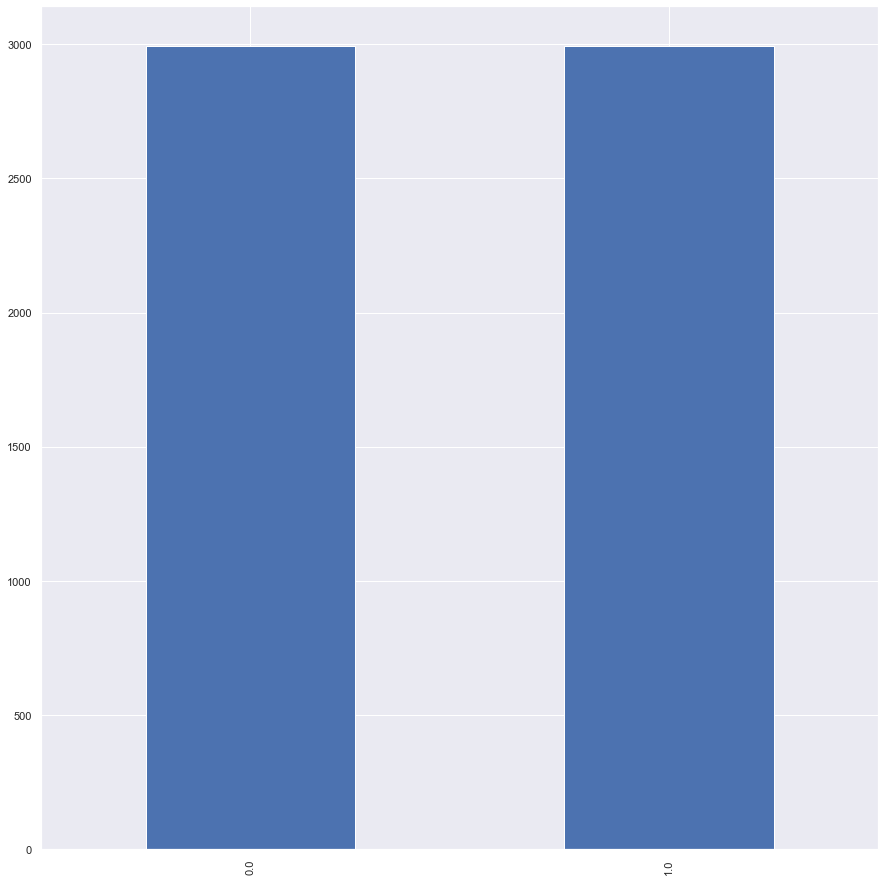

In [827]:
pd.Series(y_smoted).value_counts().plot.bar()

In [828]:
# list to contain model and accuracy values
eva_list = []
# to contain model names
models = []
# to fetch the planet names and its features
fetch_list = dict()
fetch_indexes = []

# HEADING TOWARDS MACHINE LEARNING



# ALGORITHM 1: K-Nearest Neighbour

Train Accuracy of KNN: % 99.11
Test Accuracy of KNN: % 96.64
Precision : 0.6157630738954089
Recall : 0.938061938061938
F1-score : 0.6765557435608196


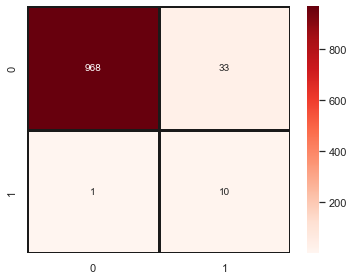

[  4  36 162 242 398 491 497 557 622 794]


In [829]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_smoted, y_smoted)
y_pred = knn.predict(x_test)

knn_acc = round(knn.score(x_smoted, y_smoted) * 100, 2)
knn_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Train Accuracy of KNN: % {knn_acc}')
print(f'Test Accuracy of KNN: % {knn_acc_test}')

# Get precision, recall, and f1
precision, recall, f1, support = score(y_test, y_pred, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

# Confusion-Matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)
plt.show()

#fetch_list.append(dict([('K-Nearest Neighbor',list(y_pred))]))
#fetch_indexes.append(('K-Nearest Neighbor',[i for i,e in enumerate(list(y_pred)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred,y_test)])
knn_tp = list(np.array(np.where(unq==3)))[0]
print(knn_tp)
fetch_list['K-Nearest Neighbour'] = knn_tp
#print(fetch_list)

In [830]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'K-Nearest Neighbour'),
    ('Train Accuracy', round(knn_acc, 2)),
    ('Test Accuracy', round(knn_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 2: Logistic Regression

Train Accuracy of Logistic Regression: % 50.0
Test Accuracy of Logistic Regression: % 98.91
Precision : 0.4945652173913043
Recall : 0.5
F1-score : 0.4972677595628415


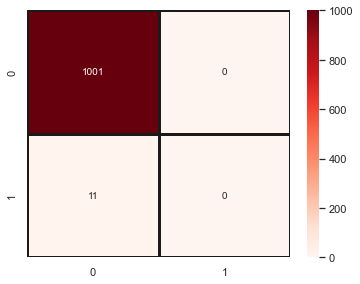

[]


In [831]:
lr = LogisticRegression()
lr.fit(x_smoted, y_smoted)
y_pred_l = lr.predict(x_test)

lr_acc = round(lr.score(x_smoted, y_smoted) * 100, 2)
lr_acc_test = round(accuracy_score(y_test, y_pred_l) * 100, 2)
print(f'Train Accuracy of Logistic Regression: % {lr_acc}')
print(f'Test Accuracy of Logistic Regression: % {lr_acc_test}')

# Get precision, recall, and f1
precision, recall, f1, support = score(y_test, y_pred_l, average = 'macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred_l),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)
plt.show()

#fetch_list.append(dict([('Logistic Regression',list(y_pred_l))]))
#fetch_indexes.append(('Logistic Regression',[i for i,e in enumerate(list(y_pred_l)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred_l,y_test)])
lr_tp = list(np.array(np.where(unq==3)))[0]
print(lr_tp)
fetch_list['Logistic Regression'] = lr_tp

In [832]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Train Accuracy', round(lr_acc, 2)),
    ('Test Accuracy', round(lr_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 3: Support Vector Classifier

Train Accuracy Score of LinearSVC: % 100.0
Test Accuracy Score of LinearSVC: % 99.01
Precision : 0.8288734720845722
Recall    : 0.5904095904095904
F1-score   : 0.6403695806680881
[491 497]


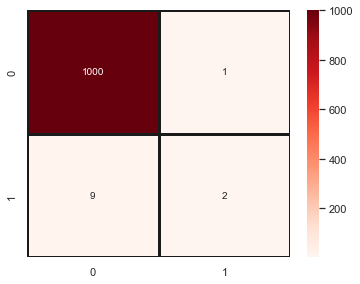

In [833]:
svc = SVC(probability=True,gamma=0.001, C=100)
svc.fit(x_smoted, y_smoted)
y_pred_s = svc.predict(x_test)

svc_acc = round(svc.score(x_smoted, y_smoted) * 100, 2)
svc_acc_test = round(accuracy_score(y_test, y_pred_s) * 100, 2)

print(f'Train Accuracy Score of LinearSVC: % {svc_acc}')
print(f'Test Accuracy Score of LinearSVC: % {svc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1, support = score(y_test, y_pred_s, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred_s),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('Support Vector Classifier',list(y_pred_s))]))
#fetch_indexes.append(('Support Vector Classifier',[i for i,e in enumerate(list(y_pred_s)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred_s,y_test)])
svc_tp = list(np.array(np.where(unq==3)))[0]
print(svc_tp)
fetch_list['Support Vector Classifier'] = svc_tp

In [834]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Support Vector Classifier'),
    ('Train Accuracy', round(svc_acc, 2)),
    ('Test Accuracy', round(svc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 4: Decision Tree Classifier

Train Accuracy Score of Decision Trees: % 100.0
Test Accuracy Score of Decision Trees: % 100.0
Precision : 1.0
Recall    : 1.0
F1-score   : 1.0
[  4  36 140 162 242 398 491 497 557 622 794]


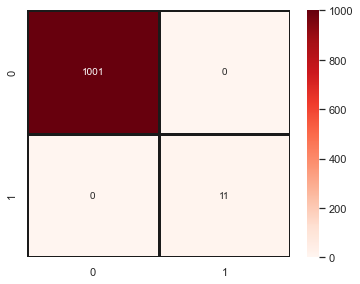

In [835]:
dt = DecisionTreeClassifier()
dt.fit(x_smoted, y_smoted)
y_pred = dt.predict(x_test)

dt_acc = round(dt.score(x_smoted, y_smoted) * 100, 2)
dt_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Train Accuracy Score of Decision Trees: % {dt_acc}')
print(f'Test Accuracy Score of Decision Trees: % {dt_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('Decision Tree Classifier',list(y_pred))]))
#fetch_indexes.append(('Decision Tree Classifier',[i for i,e in enumerate(list(y_pred)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred,y_test)])
dt_tp = list(np.array(np.where(unq==3)))[0]
print(dt_tp)
fetch_list['Decision Tree Classifier'] = dt_tp

In [836]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Decision Tree Classifier'),
    ('Train Accuracy', round(dt_acc, 2)),
    ('Test Accuracy', round(dt_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# Algorithm 5: Random Forest Classifier

Train Accuracy Score of Random Forest: % 100.0
Test Accuracy Score of Random Forest: % 99.9
Precision : 0.9583333333333333
Recall    : 0.9995004995004995
F1-score   : 0.9780109945027486
[  4  36 140 162 242 398 491 497 557 622 794]


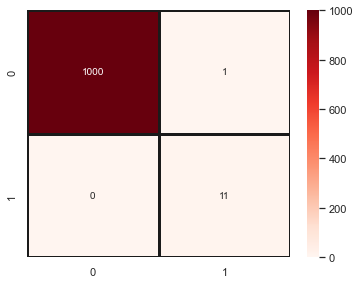

In [837]:
num_estimator = 100
seed = 7
rf = RandomForestClassifier(n_estimators=num_estimator)
rf.fit(x_smoted, y_smoted)
y_predr = rf.predict(x_test)

rf_acc = round(rf.score(x_smoted, y_smoted) * 100, 2)
rf_acc_test = round(accuracy_score(y_test, y_predr) * 100, 2)
print(f'Train Accuracy Score of Random Forest: % {rf_acc}')
print(f'Test Accuracy Score of Random Forest: % {rf_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1, support = score(y_test, y_predr, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_predr),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('Random Forest Classifier',list(y_predr))]))
#fetch_indexes.append(('Random Forest Classifier',[i for i,e in enumerate(list(y_predr)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_predr,y_test)])
rf_tp = list(np.array(np.where(unq==3)))[0]
print(rf_tp)
fetch_list['Random Forest Classifier'] = rf_tp

In [838]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Random Forest Classifier'),
    ('Train Accuracy', round(rf_acc, 2)),
    ('Test Accuracy', round(rf_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 6: Gradient Boosting Classifier 

Train Accuracy Score of Gradient Boosting: % 99.9
Test Accuracy Score of Gradient Boosting: % 99.51
Precision : 0.84375
Recall    : 0.9975024975024975
F1-score   : 0.9061555295906822
[  4  36 140 162 242 398 491 497 557 622 794]


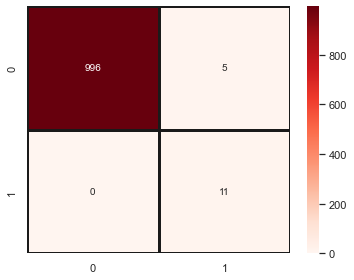

In [839]:
gbc = GradientBoostingClassifier(n_estimators=num_estimator, learning_rate=0.01,
                                random_state=seed)
gbc.fit(x_smoted, y_smoted)
y_pred_g = gbc.predict(x_test)

gbc_acc = round(gbc.score(x_smoted, y_smoted) * 100, 2)
gbc_acc_test = round(accuracy_score(y_test, y_pred_g) * 100, 2)
print(f'Train Accuracy Score of Gradient Boosting: % {gbc_acc}')
print(f'Test Accuracy Score of Gradient Boosting: % {gbc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1, support = score(y_test, y_pred_g, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred_g),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('Gradient Boosting Classifier',list(y_pred_g))]))
#fetch_indexes.append(('Gradient Boosting Classifier',[i for i,e in enumerate(list(y_pred_g)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred_g,y_test)])
gbc_tp = list(np.array(np.where(unq==3)))[0]
print(gbc_tp)
fetch_list['Gradient Boosting Classifier'] = gbc_tp

In [840]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Gradient Boosting Classifier'),
    ('Train Accuracy', round(gbc_acc, 2)),
    ('Test Accuracy', round(gbc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 7: Adaboost Classifier

Train Accuracy Score of AdaBoostClassifier: % 100.0
Test Accuracy Score of AdaBoostClassifier: % 99.9
Precision : 0.9583333333333333
Recall    : 0.9995004995004995
F1-score   : 0.9780109945027486
[  4  36 140 162 242 398 491 497 557 622 794]


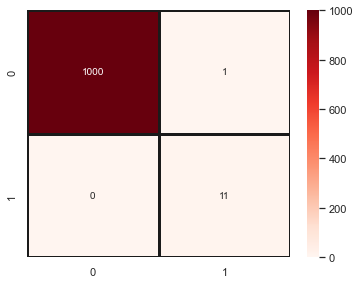

In [841]:
abc = AdaBoostClassifier(base_estimator=rf, n_estimators=num_estimator, random_state = seed)
abc.fit(x_smoted, y_smoted)
y_pred = abc.predict(x_test)

abc_acc = round(abc.score(x_smoted, y_smoted) *100 , 2)
abc_acc_test = round(accuracy_score(y_test, y_pred) * 100 ,2)

print(f'Train Accuracy Score of AdaBoostClassifier: % {abc_acc}')
print(f'Test Accuracy Score of AdaBoostClassifier: % {abc_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('AdaBoost Classifier',list(y_pred))]))
#fetch_indexes.append(('AdaBoost Classifier',[i for i,e in enumerate(list(y_pred)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred,y_test)])
abc_tp = list(np.array(np.where(unq==3)))[0]
print(abc_tp)
fetch_list['Adaboost Classifier'] = abc_tp

In [842]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Adaboost Classifier'),
    ('Train Accuracy', round(abc_acc, 2)),
    ('Test Accuracy', round(abc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 8: Naive Bayes Algorithm

Train Accuracy Score of GaussianNB: % 50.17
Test Accuracy Score of GaussianNB: % 1.78
Precision : 0.5054726368159204
Recall    : 0.5034965034965035
F1-score   : 0.017771216097987753
[  4  36 140 162 242 398 491 497 557 622 794]


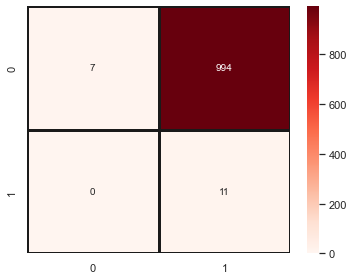

In [843]:
nbg = GaussianNB()
nbg.fit(x_smoted, y_smoted)
y_pred_n = nbg.predict(x_test)

nbg_acc=round(nbg.score(x_smoted, y_smoted) * 100, 2)
nbg_acc_test=round(accuracy_score(y_test, y_pred_n) * 100, 2)

print(f'Train Accuracy Score of GaussianNB: % {nbg_acc}')
print(f'Test Accuracy Score of GaussianNB: % {nbg_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1, support = score(y_test, y_pred_n, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred_n),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('Naive Bayes Algorithm',list(y_pred_n))]))
#fetch_indexes.append(('Naive Bayes Algorithm',[i for i,e in enumerate(list(y_pred_n)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred_n,y_test)])
nba_tp = list(np.array(np.where(unq==3)))[0]
print(nba_tp)
fetch_list['Naive Bayes Algorithm'] = nba_tp

In [844]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Naive Bayes Algorithm'),
    ('Train Accuracy', round(nbg_acc, 2)),
    ('Test Accuracy', round(nbg_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 9: Voting Classifier

Train Accuracy Score of Hard VotingClassifier: % 100.0
Test Accuracy Score of Hard VotingClassifier: % 99.9
Precision : 0.9583333333333333
Recall    : 0.9995004995004995
F1-score   : 0.9780109945027486
[  4  36 140 162 242 398 491 497 557 622 794]


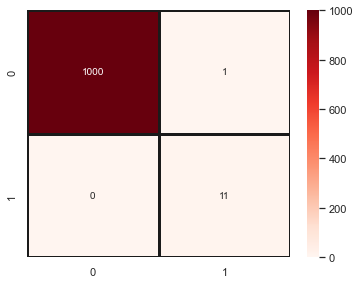

In [845]:
# Hard Voting
vc_hard = VotingClassifier(
    estimators=[('lr', lr), ('nbg',nbg), ('rf', rf), ('gbc', gbc)],
    voting = 'hard')

vc_hard.fit(x_smoted, y_smoted)
y_pred = vc_hard.predict(x_test)

vch_acc = round(vc_hard.score(x_smoted, y_smoted) * 100, 2)
vch_acc_test = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'Train Accuracy Score of Hard VotingClassifier: % {vch_acc}')
print(f'Test Accuracy Score of Hard VotingClassifier: % {vch_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_pred, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('Voting Classifier',vc_tp)]))
#fetch_indexes.append(('Voting Classifier',[i for i,e in enumerate(list(y_pred)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_pred,y_test)])
vc_tp = list(np.array(np.where(unq==3)))[0]
print(vc_tp)
fetch_list['Voting Classifier'] = vc_tp

In [846]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'Voting Classifier'),
    ('Train Accuracy', round(vch_acc, 2)),
    ('Test Accuracy', round(vch_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# ALGORITHM 10: XgBoost Classifier

[12:38:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:38:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Score of Hard VotingClassifier: % 99.95
Test Accuracy Score of Hard VotingClassifier: % 99.51
Precision : 0.84375
Recall    : 0.9975024975024975
F1-score   : 0.9061555295906822
[  4  36 140 162 242 398 491 497 557 622 794]


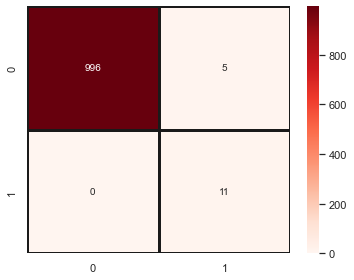

In [847]:
xgboost = xgb.XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

xgboost.fit(x_smoted, y_smoted)
y_predx = xgboost.predict(x_test)

xg_acc = round(xgboost.score(x_smoted, y_smoted) * 100, 2)
xg_acc_test = round(accuracy_score(y_test, y_predx) * 100, 2)

print(f'Train Accuracy Score of Hard VotingClassifier: % {xg_acc}')
print(f'Test Accuracy Score of Hard VotingClassifier: % {xg_acc_test}')

# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_predx, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_predx),annot=True,cmap="Reds",fmt =  "d",linecolor="k",linewidths=3)

#fetch_list.append(dict([('XGBoost Classifier',list(y_predx))]))
#fetch_indexes.append(('XGBoost Classifier',[i for i,e in enumerate(list(y_predx)) if e == 1.0]))

unq = np.array([x+2*y for x,y in zip(y_predx,y_test)])
xg_tp = list(np.array(np.where(unq==3)))[0]
print(xg_tp)

fetch_list['XgBoost Classifier'] = xg_tp

In [848]:
# Add performance parameters to list
eva_list.append(dict([
    ('Model', 'XgBoost Classifier'),
    ('Train Accuracy', round(xg_acc, 2)),
    ('Test Accuracy', round(xg_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

# Performance Evaluation

In [849]:
results = pd.DataFrame(data=eva_list)
results = results[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Recall', ascending=False)
results = results.set_index('Model')
results

,Train Accuracy,Test Accuracy,Precision,Recall,F1
Model,,,,,
Decision Tree Classifier,100.00,100.00,1.00,1.00,1.00
Random Forest Classifier,100.00,99.90,0.96,1.00,0.98
Gradient Boosting Classifier,99.90,99.51,0.84,1.00,0.91
Adaboost Classifier,100.00,99.90,0.96,1.00,0.91
Voting Classifier,100.00,99.90,0.96,1.00,0.02
XgBoost Classifier,99.95,99.51,0.84,1.00,0.02
K-Nearest Neighbour,99.11,96.64,0.62,0.94,0.68
Support Vector Classifier,100.00,99.01,0.83,0.59,0.64
Logistic Regression,50.00,98.91,0.49,0.50,0.50


In [850]:
list(results.index[:7])

['Decision Tree Classifier',
 'Random Forest Classifier',
 'Gradient Boosting Classifier',
 'Adaboost Classifier',
 'Voting Classifier',
 'XgBoost Classifier',
 'K-Nearest Neighbour']

In [851]:
fetch_list

{'K-Nearest Neighbour': array([  4,  36, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64),
 'Logistic Regression': array([], dtype=int64),
 'Support Vector Classifier': array([491, 497], dtype=int64),
 'Decision Tree Classifier': array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64),
 'Random Forest Classifier': array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64),
 'Gradient Boosting Classifier': array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64),
 'Adaboost Classifier': array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64),
 'Naive Bayes Algorithm': array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64),
 'Voting Classifier': array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64),
 'XgBoost Classifier': array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64)}

In [852]:
fetch_list.keys()

dict_keys(['K-Nearest Neighbour', 'Logistic Regression', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Adaboost Classifier', 'Naive Bayes Algorithm', 'Voting Classifier', 'XgBoost Classifier'])

In [853]:
fetch_indexes = []
for k in results.index[:7]:
    if k in list(fetch_list.keys()):
        fetch_indexes.append(set(fetch_list[k]))
print(fetch_indexes)

fetch_union = [j for i in fetch_indexes for j in i]
fetch_union = np.array(fetch_union)
fetch_union

[{162, 4, 36, 491, 140, 557, 398, 622, 497, 242, 794}, {162, 4, 36, 491, 140, 557, 398, 622, 497, 242, 794}, {162, 4, 36, 491, 140, 557, 398, 622, 497, 242, 794}, {162, 4, 36, 491, 140, 557, 398, 622, 497, 242, 794}, {162, 4, 36, 491, 140, 557, 398, 622, 497, 242, 794}, {162, 4, 36, 491, 140, 557, 398, 622, 497, 242, 794}, {162, 4, 36, 491, 557, 398, 622, 497, 242, 794}]


array([162,   4,  36, 491, 140, 557, 398, 622, 497, 242, 794, 162,   4,
        36, 491, 140, 557, 398, 622, 497, 242, 794, 162,   4,  36, 491,
       140, 557, 398, 622, 497, 242, 794, 162,   4,  36, 491, 140, 557,
       398, 622, 497, 242, 794, 162,   4,  36, 491, 140, 557, 398, 622,
       497, 242, 794, 162,   4,  36, 491, 140, 557, 398, 622, 497, 242,
       794, 162,   4,  36, 491, 557, 398, 622, 497, 242, 794], dtype=int64)

In [854]:
unique,counts = np.unique(fetch_union,return_counts=True)
counts

array([7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [855]:
unique

array([  4,  36, 140, 162, 242, 398, 491, 497, 557, 622, 794], dtype=int64)

In [856]:
#intersect = [set(fetch_indexes[]),set(fetch_indexes[2][1]),set(fetch_indexes[3][1]),set(fetch_indexes[4][1]),set(fetch_indexes[5][1]),set(fetch_indexes[6][1]),set(fetch_indexes[7][1]),set(fetch_indexes[8][1]),set(fetch_indexes[9][1])]
fetch_indexes = fetch_indexes.pop().intersection(*fetch_indexes)
fetch_indexes

{4, 36, 162, 242, 398, 491, 497, 557, 622, 794}

In [857]:
planeto_c = planeto.iloc[planeto.P_HABITABLE.iloc[test_indexes[unique]].index]

In [858]:
planeto_c['P_NAME'] = planet_name

In [859]:
counts/7*100

array([100.        , 100.        ,  85.71428571, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

In [860]:
planeto_c['HABITABILITY %'] = counts/7*100
planeto_c['HABITABILITY %'] = planeto_c['HABITABILITY %'].round()
planeto_c['HABITABILITY %']

2272    100.0
1253    100.0
740      86.0
178     100.0
4047    100.0
3809    100.0
3994    100.0
2591    100.0
3808    100.0
2590    100.0
2931    100.0
Name: HABITABILITY %, dtype: float64

In [861]:
planeto_c.columns

Index(['P_MASS', 'P_RADIUS', 'P_PERIOD', 'S_RA', 'S_DEC', 'S_MAG',
       'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_TEMPERATURE',
       'P_DISTANCE', 'P_DISTANCE_EFF', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE',
       'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'P_TYPE_TEMP', 'P_ESI',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST', 'P_GRAVITY',
       'P_HABITABLE', 'P_NAME', 'HABITABILITY %'],
      dtype='object')

In [862]:
planeto_c = planeto_c.reindex(columns=['P_NAME','P_MASS','P_HABITABLE','HABITABILITY %','P_RADIUS', 'P_PERIOD', 'S_RA', 'S_DEC', 'S_MAG',
       'S_DISTANCE', 'S_METALLICITY', 'S_MASS', 'S_RADIUS', 'S_TEMPERATURE',
       'P_DISTANCE', 'P_DISTANCE_EFF', 'P_FLUX', 'P_TEMP_EQUIL', 'P_TYPE',
       'S_RADIUS_EST', 'S_RA_H', 'S_LUMINOSITY', 'P_TYPE_TEMP', 'P_ESI',
       'P_RADIUS_EST', 'P_MASS_EST', 'P_SEMI_MAJOR_AXIS_EST', 'P_GRAVITY'])
planeto_c

,P_NAME,P_MASS,P_HABITABLE,HABITABILITY %,P_RADIUS,P_PERIOD,S_RA,S_DEC,S_MAG,S_DISTANCE,...,P_TYPE,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,P_TYPE_TEMP,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST,P_GRAVITY
2272,Kepler-186 f,1.707998,1.0,100.0,1.165840,129.944100,298.652710,43.955017,14.625,172.00,...,6.0,0.520000,19.910182,0.048165,3.0,0.579692,1.165840,1.684403,0.43200,0.084823
1253,K2-72 e,2.209522,1.0,100.0,1.289150,24.158868,334.621980,-9.612382,15.309,66.56,...,6.0,0.330000,22.308133,0.012443,3.0,0.902864,1.289150,2.209837,0.10600,0.089742
740,HD 40307 g,7.087565,1.0,86.0,2.561049,197.800000,88.517670,-60.023472,7.170,12.94,...,3.0,0.844783,5.901178,0.385749,3.0,0.687468,2.561050,7.087565,0.60000,0.072940
178,GJ 667 C e,2.542624,1.0,100.0,1.400188,62.240000,259.745090,-34.996827,10.220,6.80,...,6.0,0.429296,17.316340,0.020796,3.0,0.712194,1.400188,2.542624,0.21300,0.087541
4047,GJ 1061 d,1.680000,1.0,100.0,1.164989,13.031000,53.998749,-44.512703,13.060,3.69,...,6.0,0.156000,3.599917,0.001658,3.0,0.798200,1.164989,1.680000,0.05400,0.083554
3809,TRAPPIST-1 e,0.619765,1.0,100.0,0.919220,6.099615,346.622010,-5.041274,18.800,12.43,...,6.0,0.120000,23.108135,0.000553,3.0,0.871590,0.919220,0.619765,0.02817,0.049510
3994,Wolf 1061 c,3.410295,1.0,100.0,1.664522,17.871900,247.575240,-12.662594,10.030,4.31,...,6.0,0.310000,16.505017,0.010741,3.0,0.792711,1.664522,3.410295,0.08900,0.083084
2591,Kepler-296 f,3.942923,1.0,100.0,1.804810,63.336270,286.540010,49.437326,15.921,226.00,...,3.0,0.480000,19.102668,0.040388,3.0,0.750112,1.804810,3.912510,0.25500,0.081707
3808,TRAPPIST-1 d,0.409998,1.0,100.0,0.773490,4.049610,346.622010,-5.041274,18.800,12.43,...,5.0,0.120000,23.108135,0.000553,3.0,0.888028,0.773490,0.409998,0.02144,0.046257
2590,Kepler-296 e,2.962411,1.0,100.0,1.524560,34.142110,286.540010,49.437326,15.921,226.00,...,3.0,0.480000,19.102668,0.040388,3.0,0.796380,1.524560,2.937848,0.16900,0.086032


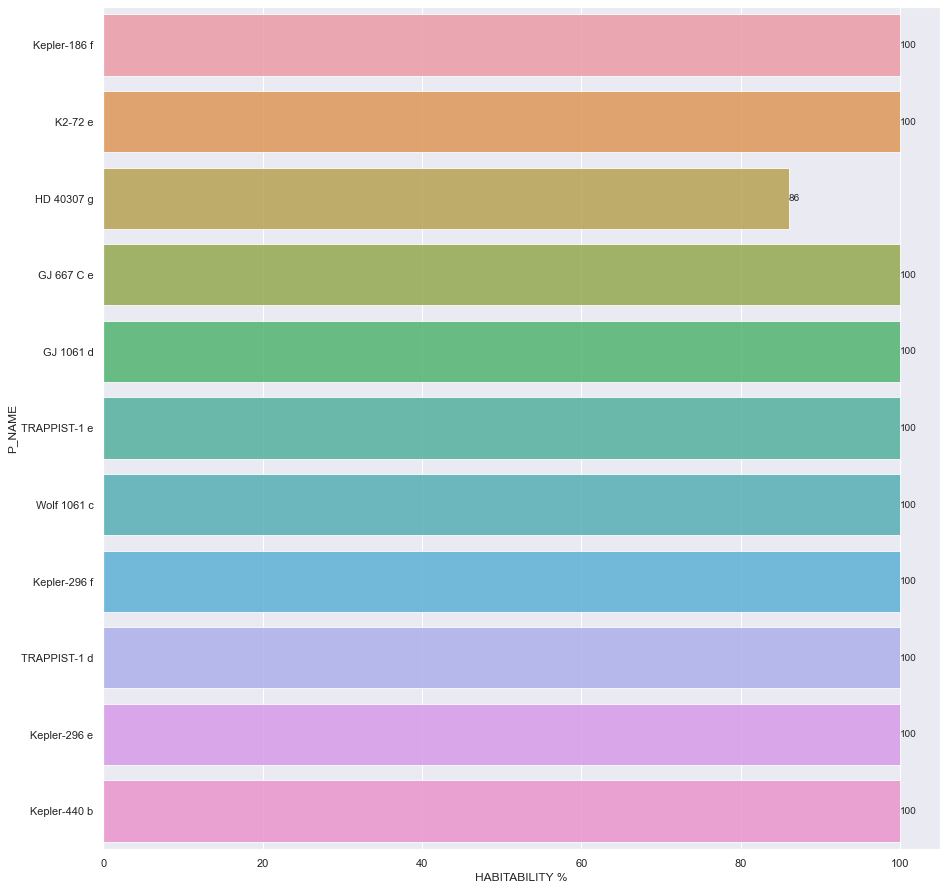

In [863]:
ax = sns.barplot(y = 'P_NAME',x = 'HABITABILITY %',data = planeto_c,alpha=0.8)
ax.bar_label(ax.containers[0])
plt.show()